<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Шаг-1.-Откроем-файлы-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Шаг-1.-Откроем-файлы-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Откроем файлы с данными и изучим общую информацию</a></span></li><li><span><a href="#Шаг-2.-Предобработаем-данные" data-toc-modified-id="Шаг-2.-Предобработаем-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработаем данные</a></span></li><li><span><a href="#Шаг-3.-Анализ-данных" data-toc-modified-id="Шаг-3.-Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Анализ данных</a></span></li><li><span><a href="#Шаг-4.-Проектирование-дашборда" data-toc-modified-id="Шаг-4.-Проектирование-дашборда-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Проектирование дашборда</a></span></li><li><span><a href="#Шаг-5.-Сегментация-участников-на-основе-просмотра-мероприятий" data-toc-modified-id="Шаг-5.-Сегментация-участников-на-основе-просмотра-мероприятий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Сегментация участников на основе просмотра мероприятий</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Анализ трансляций НМИЦ онкологии им Н.Н. Петрова

### Описание проекта
В НМИЦ им. Н.Н. Петрова проводят регулярные трансляции и вебинары для врачей, посвященные новым технологиям и методам в сфере лечения онкологии. Эти вебинары позволяют врачам из разных уголков страны получать свежую, актуальную информацию о современных методах лечения этого класса заболеваний. Необходимо обработать данные по посещаемости вебинаров, проводимых НМИЦ онкологии им. Н.Н. Петрова для дальнейшего исследования.

**Цель исследования**:
- определить наиболее интересные/неинтересные темы и популярных спикеров;
- построить наглядные визуализации, которые могут лечь в основу дашборда по мероприятиям;
- предоставить рекомендации по наполнению для будущих мероприятий

### Описание данных

Файл с данными о посещениях форумов и небольших мероприятий, проводимых в 2022 и 2023 гг.:
- Все мероприятия.csv

Таблицы с расписанием мероприятий:

- Расписание выступлений 2022.xlsx, Расписание выступлений 2023.xlsx, Расписание_небольшие_мероприятия.xlsx

Классификация мероприятий:

- Словарь рубрик белые ночи.xlsx

## Шаг 1. Откроем файлы с данными и изучим общую информацию

In [1]:
# импорт библиотек
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200) # сброс ограничений на количество символов в записи
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import Dash, dcc, html, Input, Output

In [2]:
# загрузим файлы
df = pd.read_csv('C:/Users/fima3/Documents/Onco_project/Project/Все мероприятия.csv', sep=';')
tt1 = pd.read_excel('C:/Users/fima3/Documents/Onco_project/Project/Расписание_небольшие_мероприятия.xlsx')
tt2 = pd.read_excel('C:/Users/fima3/Documents/Onco_project/Project/Расписание выступлений 2022.xlsx')
tt3 = pd.read_excel('C:/Users/fima3/Documents/Onco_project/Project/Расписание выступлений 2023.xlsx')
rub = pd.read_excel('C:/Users/fima3/Documents/Onco_project/Project/Словарь рубрик белые ночи.xlsx', header=2)

In [3]:
# напишем функцию для просмотра общей информации, статистики и первых строк каждого датасета
def info(df):
    """возвращает все атрибуты, пропуски, дубликаты, статистику и первые 5 строк датасета, переданного в качестве параметра"""
    df.info()
    display(df.shape)
    display(df.head())
    print('\n Пропуски в столбцах \n', df.isna().sum())
    print('\n Дубликаты', df.duplicated().sum())
    return df.describe()

In [4]:
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154333 entries, 0 to 154332
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   UID                         134779 non-null  float64
 1   OID                         135694 non-null  float64
 2   BARCODE                     135694 non-null  object 
 3   COUNTRY                     127206 non-null  object 
 4   REGION                      118648 non-null  object 
 5   CITY                        133047 non-null  object 
 6   PROFESSION                  133191 non-null  object 
 7   SPECIALIZATION              131793 non-null  object 
 8   Общее время просомтра, мин  135694 non-null  float64
 9   ПОТОК                       135694 non-null  float64
 10  Устройство                  135694 non-null  object 
 11  Оп.сис                      135693 non-null  object 
 12  Броузер                     135693 non-null  object 
 13  Время начала  

(154333, 26)

,UID,OID,BARCODE,COUNTRY,REGION,CITY,PROFESSION,SPECIALIZATION,"Общее время просомтра, мин",ПОТОК,Устройство,Оп.сис,Броузер,Время начала,Время окончания,Timestamp начала,Timestamp окончания,"Время просомтра, мин",Кол-во кликов,ID открытой сессии,ID закрытой сессии,IP,SERVER SESSION ID,Статус открытия,Статус закрытия,Мероприятие
0,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 09:42:30,15.09.2022 09:44:17,1.663224e+09,1.663224e+09,2,NaN,NaN,vEg3gydkv6KzcG,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_START,DESTROY_PAUSE,Лечение злокачественных новообразований головы и шеи
1,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 09:51:34,15.09.2022 09:51:37,1.663225e+09,1.663225e+09,3 сек.,NaN,NaN,vEg3gydkv6KzcG,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_RESTART_PAUSE,NaN,Лечение злокачественных новообразований головы и шеи
2,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 09:51:42,15.09.2022 09:54:55,1.663225e+09,1.663225e+09,3,NaN,NaN,bquNyVcL7eCLeE,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_START,DESTROY_STOP,Лечение злокачественных новообразований головы и шеи
3,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 09:54:57,15.09.2022 10:09:45,1.663225e+09,1.663226e+09,15,NaN,NaN,bquNyVcL7eCLeE,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_RESTART_STOP,DESTROY_PAUSE,Лечение злокачественных новообразований головы и шеи
4,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 10:10:06,15.09.2022 10:14:57,1.663226e+09,1.663226e+09,5,NaN,NaN,bquNyVcL7eCLeE,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,PLAY_RESTART_PAUSE,DESTROY_PAUSE,Лечение злокачественных новообразований головы и шеи



 Пропуски в столбцах 
 UID                            19554
OID                            18639
BARCODE                        18639
COUNTRY                        27127
REGION                         35685
CITY                           21286
PROFESSION                     21142
SPECIALIZATION                 22540
Общее время просомтра, мин     18639
ПОТОК                          18639
Устройство                     18639
Оп.сис                         18640
Броузер                        18640
Время начала                   18639
Время окончания                18639
Timestamp начала               18639
Timestamp окончания            18639
Время просомтра, мин           18639
Кол-во кликов                 146971
ID открытой сессии            147629
ID закрытой сессии             28562
IP                             23380
SERVER SESSION ID              18639
Статус открытия                82315
Статус закрытия                69443
Мероприятие                        0
dtype: int64



,UID,OID,"Общее время просомтра, мин",ПОТОК,Timestamp начала,Timestamp окончания,Кол-во кликов
count,134779.000000,135694.000000,135694.000000,135694.000000,1.356940e+05,1.356940e+05,7362.00000
mean,9520.471327,713411.674695,137.275097,3.149100,1.671860e+09,1.671863e+09,1.67210
std,6576.852007,194064.854739,171.408109,2.275562,1.576309e+07,1.576597e+07,1.53996
min,160.000000,506402.000000,0.000000,1.000000,1.656306e+09,1.656306e+09,1.00000
25%,3323.000000,530290.000000,0.000000,1.000000,1.656487e+09,1.656488e+09,1.00000
50%,9523.000000,550477.000000,40.000000,3.000000,1.656846e+09,1.656847e+09,1.00000
75%,15049.000000,921002.000000,272.000000,4.000000,1.688555e+09,1.688556e+09,2.00000
max,22659.000000,994511.000000,1660.000000,11.000000,1.688833e+09,1.688833e+09,55.00000


In [5]:
info(tt1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 54 non-null     object
 1   datestart_lectures   54 non-null     object
 2   datefinish_lectures  54 non-null     object
 3   duration_mins        53 non-null     object
 4   lecture_name         54 non-null     object
 5   speaker_name         54 non-null     object
dtypes: object(6)
memory usage: 2.7+ KB


(54, 6)

,date,datestart_lectures,datefinish_lectures,duration_mins,lecture_name,speaker_name
0,15.09.2022,15.09.2022 10:00,15.09.2022 11:15,10:00 – 11:15,Трансляция фильма «Ларингэктомия. Установка голосового протеза. Замена голосового протеза»,Раджабова Замираа Ахмедовна
1,16.09.2022,16.09.2022 11:00,16.09.2022 11:30,11:00-11:20,Патоморфологический профиль пациентов с плоскоклеточным раком головы и шеи,Чуглова Дина Александровна
2,16.09.2022,16.09.2022 11:30,16.09.2022 12:00,11:30-11:50,Современные подходы в лечении пациентов с плоскоклеточным раком головы и шеи,Раджабова Замираа Ахмедовна
3,16.09.2022,16.09.2022 12:00,16.09.2022 12:30,12:00-12:20,Сонографические признаки поражения лимфатических узлов шеи,Костромина Екатерина Викторовна
4,16.09.2022,16.09.2022 12:30,16.09.2022 13:00,NaN,Лучевая терапия в лечении пациентов с плоскоклеточным раком головы и шеи,Гиршович Михаил Маркович



 Пропуски в столбцах 
 date                   0
datestart_lectures     0
datefinish_lectures    0
duration_mins          1
lecture_name           0
speaker_name           0
dtype: int64

 Дубликаты 0


,date,datestart_lectures,datefinish_lectures,duration_mins,lecture_name,speaker_name
count,54,54,54,53,54,54
unique,8,54,54,48,53,48
top,17.03.2023,15.09.2022 10:00,15.09.2022 11:15,15:20-15:35,Live surgery: Лапароскопический доступ в хирургии рака эндометрия,Берлев Игорь Викторович
freq,16,1,1,2,2,3


In [6]:
info(tt2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Время начала
(UTC+3 МСК)      1331 non-null   object
 1   Время окончания 
(UTC+3 МСК)  1330 non-null   object
 2   Продолжительность             1312 non-null   object
 3   Дата                          1347 non-null   object
 4   Поток                         1347 non-null   object
 5   Название доклада              1343 non-null   object
 6   ФИО полностью                 745 non-null    object
 7   Учреждение/Организация        733 non-null    object
 8   Город                         733 non-null    object
dtypes: object(9)
memory usage: 95.0+ KB


(1350, 9)

,Время начала\n(UTC+3 МСК),Время окончания \n(UTC+3 МСК),Продолжительность,Дата,Поток,Название доклада,ФИО полностью,Учреждение/Организация,Город
0,10:00:00,10:20:00,00:20:00,2022-06-27 00:00:00,1 поток,Объем хирургического вмешательства на молочной железе,Табагуа Тенгиз Тенгизович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург
1,10:20:00,10:25:00,00:05:00,2022-06-27 00:00:00,1 поток,Дискуссия,NaN,NaN,NaN
2,10:25:00,10:45:00,00:20:00,2022-06-27 00:00:00,1 поток,Объем хирургического вмешательства на регионарных коллекторах,Петровский Александр Валерьевич,ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России,Москва
3,10:45:00,10:50:00,00:05:00,2022-06-27 00:00:00,1 поток,Дискуссия,NaN,NaN,NaN
4,10:50:00,11:10:00,00:20:00,2022-06-27 00:00:00,1 поток,Лучевая терапия,Брянцева Жанна Викторовна,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург



 Пропуски в столбцах 
 Время начала\n(UTC+3 МСК)         19
Время окончания \n(UTC+3 МСК)     20
Продолжительность                 38
Дата                               3
Поток                              3
Название доклада                   7
ФИО полностью                    605
Учреждение/Организация           617
Город                            617
dtype: int64

 Дубликаты 1


,Время начала\n(UTC+3 МСК),Время окончания \n(UTC+3 МСК),Продолжительность,Дата,Поток,Название доклада,ФИО полностью,Учреждение/Организация,Город
count,1331,1330,1312,1347,1347,1343,745,733,733
unique,127,129,18,8,14,648,558,188,57
top,15:00:00,17:00:00,00:05:00,2022-07-01 00:00:00,3 поток,Дискуссия,"Ведущие, выступающий",ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург
freq,61,52,488,212,259,468,11,216,346


In [7]:
info(tt3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Время начала
(UTC+3 МСК)      1520 non-null   object        
 1   Время окончания 
(UTC+3 МСК)  1520 non-null   object        
 2   Продолжительность             1511 non-null   object        
 3   Дата                          1567 non-null   datetime64[ns]
 4   Поток                         1567 non-null   object        
 5   Название доклада              1533 non-null   object        
 6   ФИО полностью                 907 non-null    object        
 7   Учреждение/Организация        894 non-null    object        
 8   Город                         894 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 110.3+ KB


(1567, 9)

,Время начала\n(UTC+3 МСК),Время окончания \n(UTC+3 МСК),Продолжительность,Дата,Поток,Название доклада,ФИО полностью,Учреждение/Организация,Город
0,11:00:00,11:05:00,00:05:00,2023-07-03,-,Приветственное слово,Беляев Алексей Михайлович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург
1,11:05:00,11:10:00,00:05:00,2023-07-03,-,Приветственное слово,Лазуткина Юлия Викторовна,Федеральное собрание Российской Федерации,Москва
2,11:10:00,11:15:00,00:05:00,2023-07-03,-,Приветственное слово,Миниздрав?,NaN,NaN
3,11:15:00,11:20:00,00:05:00,2023-07-03,-,Приветственное слово,Дашков Павел Петрович,Аппарат полномочного представителя Президента Российской Федерации в Северо-Западном федеральном округе,Санкт-Петербург
4,11:20:00,11:25:00,00:05:00,2023-07-03,-,Приветственное слово,Киселева Елена Юрьевна,Законодательное собрание Санкт-Петербурга,Санкт-Петербург



 Пропуски в столбцах 
 Время начала\n(UTC+3 МСК)         47
Время окончания \n(UTC+3 МСК)     47
Продолжительность                 56
Дата                               0
Поток                              0
Название доклада                  34
ФИО полностью                    660
Учреждение/Организация           673
Город                            673
dtype: int64

 Дубликаты 15


,Время начала\n(UTC+3 МСК),Время окончания \n(UTC+3 МСК),Продолжительность,Дата,Поток,Название доклада,ФИО полностью,Учреждение/Организация,Город
count,1520,1520,1511,1567,1567,1533,907,894,894
unique,120,124,19,6,13,791,648,220,71
top,10:00:00,11:30:00,00:05:00,2023-07-07 00:00:00,3 поток,Дискуссия,Семиглазова Татьяна Юрьевна,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург
freq,35,45,559,358,222,535,12,281,425
first,NaN,NaN,NaN,2023-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2023-07-08 00:00:00,NaN,NaN,NaN,NaN,NaN


In [8]:
info(rub)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Год                 343 non-null    int64         
 1   Дата                343 non-null    datetime64[ns]
 2   Поток               343 non-null    object        
 3   Начало              343 non-null    object        
 4   Конец               327 non-null    object        
 5   Сессия              343 non-null    object        
 6   Код классификатора  343 non-null    object        
 7   Направление         343 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 21.6+ KB


(343, 8)

,Год,Дата,Поток,Начало,Конец,Сессия,Код классификатора,Направление
0,2022,2022-06-27,1 поток,10:00:00,12:00:00,"Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS",Основное,Мультидисциплинарное
1,2022,2022-06-27,1 поток,10:00:00,12:00:00,"Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS",Нозологии,Молочная железа
2,2022,2022-06-27,1 поток,13:00:00,15:00:00,Неоадъювантная терапия РМЖ от А до Я,Основное,Лекарственная терапия
3,2022,2022-06-27,1 поток,13:00:00,15:00:00,Неоадъювантная терапия РМЖ от А до Я,Нозологии,Молочная железа
4,2022,2022-06-27,1 поток,15:30:00,17:25:00,VIII Конференция им. М.Л. Гершановича: сессия по заявкам,Основное,Оргздрав



 Пропуски в столбцах 
 Год                    0
Дата                   0
Поток                  0
Начало                 0
Конец                 16
Сессия                 0
Код классификатора     0
Направление            0
dtype: int64

 Дубликаты 1


,Год
count,343.000000
mean,2022.516035
std,0.500473
min,2022.000000
25%,2022.000000
50%,2023.000000
75%,2023.000000
max,2023.000000


## Шаг 2. Предобработаем данные

Предобработаем файл с данными по мероприятиям. Посчитаем, сколько дубликатов в данных.

In [9]:
df.duplicated().sum()

20130

In [10]:
f'Доля дубликатов от всех значений: {df.duplicated().sum()/len(df):.2%}'

'Доля дубликатов от всех значений: 13.04%'

Удалим дубликаты

In [11]:
df = df.drop_duplicates().reset_index(drop=True)

In [12]:
df.columns

Index(['UID', 'OID', 'BARCODE', 'COUNTRY', 'REGION', 'CITY', 'PROFESSION',
       'SPECIALIZATION', 'Общее время просомтра, мин', 'ПОТОК', 'Устройство',
       'Оп.сис', 'Броузер', 'Время начала', 'Время окончания',
       'Timestamp начала', 'Timestamp окончания', 'Время просомтра, мин',
       'Кол-во кликов', 'ID открытой сессии', 'ID закрытой сессии', 'IP',
       'SERVER SESSION ID', 'Статус открытия', 'Статус закрытия',
       'Мероприятие'],
      dtype='object')

Переименуем столбцы.

In [13]:
df.columns = ['uid', 'oid', 'barcode', 'country', 'region', 'city', 'profession', 'specialization', 'totalviewingtime', 'potok', 
           'device', 'opsystem', 'browser', 'datestart', 'dateend', 'timestampstart', 'timestampend', 'timeviews', 'countclick',
            'idopenses', 'idcloseses', 'ip', 'serversession', 'openingstatus', 'closestatus', 'event']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134203 entries, 0 to 134202
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uid               133280 non-null  float64
 1   oid               134195 non-null  float64
 2   barcode           134195 non-null  object 
 3   country           125708 non-null  object 
 4   region            117155 non-null  object 
 5   city              131549 non-null  object 
 6   profession        131692 non-null  object 
 7   specialization    130295 non-null  object 
 8   totalviewingtime  134195 non-null  float64
 9   potok             134195 non-null  float64
 10  device            134195 non-null  object 
 11  opsystem          134194 non-null  object 
 12  browser           134194 non-null  object 
 13  datestart         134195 non-null  object 
 14  dateend           134195 non-null  object 
 15  timestampstart    134195 non-null  float64
 16  timestampend      13

Проверим, сколько пропусков в датасете.

In [15]:
df.isna().sum()

uid                    923
oid                      8
barcode                  8
country               8495
region               17048
city                  2654
profession            2511
specialization        3908
totalviewingtime         8
potok                    8
device                   8
opsystem                 9
browser                  9
datestart                8
dateend                  8
timestampstart           8
timestampend             8
timeviews                8
countclick          126841
idopenses           127499
idcloseses            9931
ip                    3879
serversession            8
openingstatus        62777
closestatus          49928
event                    0
dtype: int64

In [16]:
# удалим пропуски по полю идентификатора участника
df = df.dropna(subset=['uid'])

In [17]:
df.isna().sum()

uid                      0
oid                      0
barcode                  0
country               7572
region               16125
city                  1731
profession            1588
specialization        2985
totalviewingtime         0
potok                    0
device                   0
opsystem                 1
browser                  1
datestart                0
dateend                  0
timestampstart           0
timestampend             0
timeviews                0
countclick          125918
idopenses           126583
idcloseses            9908
ip                    3871
serversession            0
openingstatus        62769
closestatus          49842
event                    0
dtype: int64

In [18]:
# удалим столбцы, которые не потребуются для анализа
df = df.drop(columns=['countclick', 'idopenses', 'idcloseses', 'openingstatus', 'closestatus'])

In [19]:
df['potok'].value_counts()

1.0     42167
2.0     22966
3.0     20844
4.0     16920
5.0     10444
6.0      8302
7.0      4413
10.0     2520
8.0      2319
9.0      1458
11.0      927
Name: potok, dtype: int64

In [20]:
df.head()

,uid,oid,barcode,country,region,city,profession,specialization,totalviewingtime,potok,device,opsystem,browser,datestart,dateend,timestampstart,timestampend,timeviews,ip,serversession,event
0,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 09:42:30,15.09.2022 09:44:17,1.663224e+09,1.663224e+09,2,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,Лечение злокачественных новообразований головы и шеи
1,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 09:51:34,15.09.2022 09:51:37,1.663225e+09,1.663225e+09,3 сек.,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,Лечение злокачественных новообразований головы и шеи
2,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 09:51:42,15.09.2022 09:54:55,1.663225e+09,1.663225e+09,3,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,Лечение злокачественных новообразований головы и шеи
3,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 09:54:57,15.09.2022 10:09:45,1.663225e+09,1.663226e+09,15,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,Лечение злокачественных новообразований головы и шеи
4,16573.0,626199.0,0809202204421616573,Россия,Амурская обл.,NaN,Врач,онкология: хирургия (огш),52.0,1.0,Десктоп,Windows,Chrome,15.09.2022 10:10:06,15.09.2022 10:14:57,1.663226e+09,1.663226e+09,5,212.124.21.110,vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu,Лечение злокачественных новообразований головы и шеи


In [21]:
df['event'].value_counts()

VIII Петербургский международный онкологический форум Белые ночи                                                                         67723
IX Петербургский международный онкологический форум Белые ночи                                                                           60731
Рак эндометрия. Без прошлого нет будущего                                                                                                 3372
Плоскодетекторная компьютерная томография в интервенционной онкологии                                                                      628
Лечение злокачественных новообразований головы и шеи                                                                                       330
I Мультидисциплинарная международная конференция                                                                                           301
Школа криогенных технологий. Криохирургические технологии в лечении базальноклеточного рака кожи: эпидемиология, диагностика, лечение      120

In [22]:
df['datestart'].value_counts()

04.07.2023 13:42       129
04.07.2023 13:40       115
04.07.2023 13:39        89
04.07.2023 13:41        87
04.07.2023 12:07        78
                      ... 
27.06.2022 10:36:50      1
27.06.2022 10:36:53      1
27.06.2022 11:01:11      1
27.06.2022 11:05:06      1
07.07.2023 17:41         1
Name: datestart, Length: 62489, dtype: int64

In [23]:
# поменяем форматы даты  
df['datestart'] = pd.to_datetime(df['datestart'])

In [24]:
df['dateend'] = pd.to_datetime(df['dateend'])

In [25]:
df['timestampstart'] = pd.to_datetime(df['timestampstart'], unit='s') + pd.Timedelta(hours=3) 
df['timestampend'] = pd.to_datetime(df['timestampend'], unit='s') + pd.Timedelta(hours=3) 

In [26]:
df.dtypes

uid                        float64
oid                        float64
barcode                     object
country                     object
region                      object
city                        object
profession                  object
specialization              object
totalviewingtime           float64
potok                      float64
device                      object
opsystem                    object
browser                     object
datestart           datetime64[ns]
dateend             datetime64[ns]
timestampstart      datetime64[ns]
timestampend        datetime64[ns]
timeviews                   object
ip                          object
serversession               object
event                       object
dtype: object

Найдем время просмотра сессии в секундах.

In [27]:
df['timeview_sec'] = (df['timestampend'] - df['timestampstart']).astype('timedelta64[s]')

Разобьем мероприятия на два типа - форумы и небольшие мероприятия.

In [28]:
df['event_type'] =  df['event'].apply(lambda x: 'forum' if 'ночи' in x else 'small events')

In [29]:
df[df['event_type'] == 'small events']['potok'].value_counts()

1.0    4826
Name: potok, dtype: int64

Объединим таблицы с расписанием мероприятий  на форумах в одну и проведем ее предобработку.

In [30]:
tt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Время начала
(UTC+3 МСК)      1331 non-null   object
 1   Время окончания 
(UTC+3 МСК)  1330 non-null   object
 2   Продолжительность             1312 non-null   object
 3   Дата                          1347 non-null   object
 4   Поток                         1347 non-null   object
 5   Название доклада              1343 non-null   object
 6   ФИО полностью                 745 non-null    object
 7   Учреждение/Организация        733 non-null    object
 8   Город                         733 non-null    object
dtypes: object(9)
memory usage: 95.0+ KB


In [31]:
tt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Время начала
(UTC+3 МСК)      1520 non-null   object        
 1   Время окончания 
(UTC+3 МСК)  1520 non-null   object        
 2   Продолжительность             1511 non-null   object        
 3   Дата                          1567 non-null   datetime64[ns]
 4   Поток                         1567 non-null   object        
 5   Название доклада              1533 non-null   object        
 6   ФИО полностью                 907 non-null    object        
 7   Учреждение/Организация        894 non-null    object        
 8   Город                         894 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 110.3+ KB


In [32]:
tt3.head()

,Время начала\n(UTC+3 МСК),Время окончания \n(UTC+3 МСК),Продолжительность,Дата,Поток,Название доклада,ФИО полностью,Учреждение/Организация,Город
0,11:00:00,11:05:00,00:05:00,2023-07-03,-,Приветственное слово,Беляев Алексей Михайлович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург
1,11:05:00,11:10:00,00:05:00,2023-07-03,-,Приветственное слово,Лазуткина Юлия Викторовна,Федеральное собрание Российской Федерации,Москва
2,11:10:00,11:15:00,00:05:00,2023-07-03,-,Приветственное слово,Миниздрав?,NaN,NaN
3,11:15:00,11:20:00,00:05:00,2023-07-03,-,Приветственное слово,Дашков Павел Петрович,Аппарат полномочного представителя Президента Российской Федерации в Северо-Западном федеральном округе,Санкт-Петербург
4,11:20:00,11:25:00,00:05:00,2023-07-03,-,Приветственное слово,Киселева Елена Юрьевна,Законодательное собрание Санкт-Петербурга,Санкт-Петербург


In [33]:
tt = pd.concat([tt2, tt3], axis=0)

In [34]:
# переименуем столбцы
tt.columns = ['time_start', 'time_end', 'duration', 'date', 'potok', 'title', 'speaker', 'company', 'city']

Предобработаем расписание небольших мероприятий.

In [35]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 54 non-null     object
 1   datestart_lectures   54 non-null     object
 2   datefinish_lectures  54 non-null     object
 3   duration_mins        53 non-null     object
 4   lecture_name         54 non-null     object
 5   speaker_name         54 non-null     object
dtypes: object(6)
memory usage: 2.7+ KB


In [36]:
tt1.head()

,date,datestart_lectures,datefinish_lectures,duration_mins,lecture_name,speaker_name
0,15.09.2022,15.09.2022 10:00,15.09.2022 11:15,10:00 – 11:15,Трансляция фильма «Ларингэктомия. Установка голосового протеза. Замена голосового протеза»,Раджабова Замираа Ахмедовна
1,16.09.2022,16.09.2022 11:00,16.09.2022 11:30,11:00-11:20,Патоморфологический профиль пациентов с плоскоклеточным раком головы и шеи,Чуглова Дина Александровна
2,16.09.2022,16.09.2022 11:30,16.09.2022 12:00,11:30-11:50,Современные подходы в лечении пациентов с плоскоклеточным раком головы и шеи,Раджабова Замираа Ахмедовна
3,16.09.2022,16.09.2022 12:00,16.09.2022 12:30,12:00-12:20,Сонографические признаки поражения лимфатических узлов шеи,Костромина Екатерина Викторовна
4,16.09.2022,16.09.2022 12:30,16.09.2022 13:00,NaN,Лучевая терапия в лечении пациентов с плоскоклеточным раком головы и шеи,Гиршович Михаил Маркович


In [37]:
tt1.columns = ['date','time_start', 'time_end', 'duration', 'title', 'speaker']

In [38]:
tt1['date'] = pd.to_datetime(tt1['date'], format = '%d.%m.%Y')

In [39]:
tt1['time_start'] = tt1['time_start'].apply(lambda x: x.split(" ")[1])

In [40]:
tt1['time_end'] = tt1['time_end'].apply(lambda x: x.split(" ")[1])

In [41]:
tt1['time_start'] = pd.to_datetime(tt1['time_start'], format = '%H:%M')
tt1['time_end'] = pd.to_datetime(tt1['time_end'], format = '%H:%M')

Посчитаем продолжительность мероприятий.

In [42]:
tt1['duration'] = tt1['time_end'] - tt1['time_start']

In [43]:
# переведем продолжительность в секунды
tt1['duration'] = tt1['duration'].astype('timedelta64[s]')

In [44]:
tt1['time_start'] = tt1['time_start'].dt.time
tt1['time_end'] = tt1['time_end'].dt.time

Так как у всех неболтших мероприятий поток 1, то добавим поле с потоком в расписание.

In [45]:
tt1['potok'] = '1 поток'

Объединим расписания форумов и небольших мероприятий.

In [46]:
tt=pd.concat([tt, tt1], axis=0)

In [47]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2971 entries, 0 to 53
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time_start  2905 non-null   object
 1   time_end    2904 non-null   object
 2   duration    2877 non-null   object
 3   date        2968 non-null   object
 4   potok       2968 non-null   object
 5   title       2930 non-null   object
 6   speaker     1706 non-null   object
 7   company     1627 non-null   object
 8   city        1627 non-null   object
dtypes: object(9)
memory usage: 232.1+ KB


In [48]:
# проверим на пропуски
tt.isna().sum()

time_start      66
time_end        67
duration        94
date             3
potok            3
title           41
speaker       1265
company       1344
city          1344
dtype: int64

Без информации о времени начала и окончания мероприятия мы не сможем определить, что за мероприятие посещал участник, поэтому нужно удалить эти пропуски.

In [49]:
f'Доля пропусков от всех значений: {tt["time_end"].isna().sum()/len(tt):.2%}'

'Доля пропусков от всех значений: 2.26%'

In [50]:
tt = tt.dropna(subset=['time_end'] )

In [51]:
# посчитаем дубликаты
tt.duplicated().sum()

13

In [52]:
tt = tt.drop_duplicates().reset_index(drop=True)

In [53]:
tt['date'].value_counts()

2023-07-07 00:00:00    336
2023-07-06 00:00:00    305
2023-07-05 00:00:00    290
2023-07-04 00:00:00    290
2023-07-08 00:00:00    245
2022-07-01 00:00:00    204
2022-06-28 00:00:00    202
2022-06-30 00:00:00    201
2022-07-02 00:00:00    192
2022-06-29 00:00:00    179
2022-06-27 00:00:00    176
2022-07-03 00:00:00    173
2023-07-03 00:00:00     41
2023-03-17 00:00:00     16
2023-04-27 00:00:00     15
2023-01-23 00:00:00      8
2023-02-17 00:00:00      7
2022-09-16 00:00:00      5
Дата                     1
2022-09-15 00:00:00      1
2023-01-24 00:00:00      1
2023-02-20 00:00:00      1
Name: date, dtype: int64

In [54]:
tt = tt[tt['date']!='Дата'].reset_index(drop=True)
tt['date'] = pd.to_datetime(tt['date'])

In [55]:
tt['time_start'].value_counts()

15:00:00               94
10:00:00               74
12:30:00               57
10:20:00               54
11:00:00               53
                       ..
1900-01-03 12:00:00     1
1900-01-01 11:55:00     1
08:55:00                1
08:40:00                1
08:45:00                1
Name: time_start, Length: 137, dtype: int64

In [56]:
def time_format_(x):
    '''Функция преобразует формат в поле time_start для неоднородных данных'''    
    try:
        return pd.to_datetime(x, format='%H:%M:%S')
    except:
        pass
    return pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
    
tt['time_start'] = tt['time_start'].apply(time_format_)

In [57]:
tt['time_end'].value_counts()

17:00:00               64
15:00:00               59
12:30:00               56
11:30:00               54
12:00:00               53
                       ..
1900-01-03 12:45:00     1
1900-01-03 12:30:00     1
1900-01-03 12:00:00     1
1900-01-01 11:55:00     1
18:10:00                1
Name: time_end, Length: 142, dtype: int64

In [58]:
tt[tt['time_end'] == 'до окончания операции']

,time_start,time_end,duration,date,potok,title,speaker,company,city
175,1900-01-01 10:00:00,до окончания операции,NaN,2022-06-27,6 поток,Live-surgery: Современные возможности визуализации и хирургического лечения при эндоскопических операциях немышечно-инвазивного рака мочевого пузыря,Носов Александр Константинович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург
375,1900-01-01 10:00:00,до окончания операции,NaN,2022-06-28,6 поток,Лапароскопическая простатэктомия,Носов Александр Константинович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург
376,1900-01-01 10:00:00,до окончания операции,NaN,2022-06-28,6 поток,Лапароскопическая простатэктомия,Петров Сергей Борисович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург
377,1900-01-01 10:00:00,до окончания операции,NaN,2022-06-28,6 поток,Роботическая простатэктомия,Мосоян Мкртич (Михаил) Семенович,ФГБУ «НМИЦ им. В.А. Алмазова» Минздрава России,Санкт-Петербург
1144,1900-01-01 09:00:00,до окончания операции,NaN,2022-07-02,6 поток,Live-surgery: Возможности оперативной эндоскопии в онкологии,Кашин Сергей Владимирович,ГБУЗ Ярославской области «Областная клиническая онкологическая больница»,Ярославль
1145,1900-01-01 09:00:00,до окончания операции,NaN,2022-07-02,6 поток,Live-surgery: Возможности оперативной эндоскопии в онкологии,Крайнова Екатерина Альбертовна,ГБУЗ Ярославской области «Областная клиническая онкологическая больница»,Ярославль
1146,1900-01-01 09:00:00,до окончания операции,NaN,2022-07-02,6 поток,Live-surgery: Возможности оперативной эндоскопии в онкологии,Куваев Роман Олегович,ГБУЗ Ярославской области «Областная клиническая онкологическая больница»,Ярославль
1147,1900-01-01 09:00:00,до окончания операции,NaN,2022-07-02,6 поток,Live-surgery: Возможности оперативной эндоскопии в онкологии,Орлов Олег Юрьевич,СПБ ГБУЗ «Елизаветинская больница»,Санкт-Петербург
1148,1900-01-01 09:00:00,до окончания операции,NaN,2022-07-02,6 поток,Live-surgery: Возможности оперативной эндоскопии в онкологии,Пирогов Сергей Сергеевич,МНИОИ им. П. А. Герцена — филиал ФГБУ «НМИЦ радиологии» Минздрава России,Москва
1149,1900-01-01 09:00:00,до окончания операции,NaN,2022-07-02,6 поток,Live-surgery: Возможности оперативной эндоскопии в онкологии,Ткаченко Михаил Арнольдович,ФГБОУ ВО «Санкт-Петербургский государственный педиатрический медицинский университет»,Санкт-Петербург


Посмотрим на среднее время просмотра таких онлайн операций.

In [59]:
df[(df['timestampstart'].dt.date.astype('str') == '2022-06-27') & (df['potok'] == 6)].describe()

,uid,oid,totalviewingtime,potok,timeview_sec
count,277.000000,277.000000,277.000000,277.0,277.000000
mean,8795.317690,524272.028881,206.815884,6.0,131.133574
std,5723.576773,10300.496841,163.486666,0.0,386.046639
min,459.000000,506406.000000,0.000000,6.0,0.000000
25%,2664.000000,508100.000000,79.000000,6.0,1.000000
50%,9974.000000,529993.000000,214.000000,6.0,6.000000
75%,14725.000000,531136.000000,290.000000,6.0,28.000000
max,15702.000000,536521.000000,1311.000000,6.0,2730.000000


In [60]:
df[(df['timestampstart'].dt.date.astype('str') == '2022-06-28') & (df['potok'] == 6)].describe()

,uid,oid,totalviewingtime,potok,timeview_sec
count,336.00000,336.000000,336.000000,336.0,336.000000
mean,8710.91369,529207.276786,193.875000,6.0,467.339286
std,5529.72180,8814.043004,170.666304,0.0,1397.965850
min,343.00000,506632.000000,0.000000,6.0,0.000000
25%,3430.25000,528649.000000,66.000000,6.0,1.000000
50%,9437.00000,530777.000000,171.000000,6.0,8.000000
75%,14717.00000,531604.000000,284.000000,6.0,115.500000
max,15744.00000,563804.000000,1029.000000,6.0,9847.000000


In [61]:
df[(df['timestampstart'].dt.date.astype('str') == '2022-07-02') & (df['potok'] == 6)].describe()

,uid,oid,totalviewingtime,potok,timeview_sec
count,199.000000,199.000000,199.000000,199.0,199.000000
mean,8421.728643,526842.075377,210.457286,6.0,670.984925
std,5324.566297,10402.680985,188.379686,0.0,2017.416396
min,515.000000,506491.000000,0.000000,6.0,0.000000
25%,3374.500000,528154.000000,40.000000,6.0,7.000000
50%,9750.000000,530908.000000,227.000000,6.0,45.000000
75%,13545.000000,531504.000000,336.000000,6.0,487.000000
max,15755.000000,571903.000000,1004.000000,6.0,20303.000000


In [62]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-07-04') & (df['potok'] == 9)].describe()

,uid,oid,totalviewingtime,potok,timeview_sec
count,41.000000,41.000000,41.0,41.0,41.000000
mean,12209.536585,921877.463415,0.0,9.0,29461.268293
std,8851.844071,8396.119038,0.0,0.0,1553.914686
min,896.000000,905921.000000,0.0,9.0,26966.000000
25%,3515.000000,915683.000000,0.0,9.0,28190.000000
50%,13538.000000,924272.000000,0.0,9.0,29876.000000
75%,21447.000000,925578.000000,0.0,9.0,31035.000000
max,22429.000000,934278.000000,0.0,9.0,31517.000000


In [63]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-07-04') & (df['potok'] == 10)].describe()

,uid,oid,totalviewingtime,potok,timeview_sec
count,290.000000,290.000000,290.0,290.0,290.000000
mean,13032.355172,919337.351724,0.0,10.0,26243.955172
std,8394.656370,8307.196906,0.0,0.0,3190.386310
min,459.000000,905459.000000,0.0,10.0,21550.000000
25%,3515.000000,912366.000000,0.0,10.0,23733.250000
50%,15199.000000,920907.000000,0.0,10.0,25661.000000
75%,21256.000000,924715.000000,0.0,10.0,29175.750000
max,22429.000000,934278.000000,0.0,10.0,32406.000000


In [64]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-07-06') & (df['potok'] == 10)].describe()

,uid,oid,totalviewingtime,potok,timeview_sec
count,533.000000,533.000000,533.0,533.0,533.000000
mean,10581.923077,920817.782364,0.0,10.0,733.309568
std,8307.593745,10915.803880,0.0,0.0,1456.033980
min,266.000000,905459.000000,0.0,10.0,0.000000
25%,2213.000000,915133.000000,0.0,10.0,6.000000
50%,10108.000000,921257.000000,0.0,10.0,80.000000
75%,19632.000000,924459.000000,0.0,10.0,714.000000
max,22595.000000,965179.000000,0.0,10.0,14989.000000


In [65]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-07-07') & (df['potok'] == 9)].describe()

,uid,oid,totalviewingtime,potok,timeview_sec
count,802.000000,802.000000,802.0,802.0,802.000000
mean,9761.547382,922198.907731,0.0,9.0,603.655860
std,7024.814143,11544.836443,0.0,0.0,1240.726163
min,266.000000,905487.000000,0.0,9.0,0.000000
25%,3854.000000,914094.000000,0.0,9.0,3.000000
50%,9928.000000,923112.000000,0.0,9.0,23.500000
75%,13892.000000,924871.000000,0.0,9.0,441.500000
max,22646.000000,984264.000000,0.0,9.0,11006.000000


04-07-2023 были длительные просмотры, поэтому там заменим время конца на время начала + 7 часов. А в остальных случаях добавим 2 часа к времени начала.

In [66]:
def time_replace(x):
    if (x['time_end']=='до окончания операции') & (x['date'] == datetime.strptime('2023-07-04', '%Y-%m-%d')):
        return x['time_start']+pd.Timedelta(hours=7)
    return x['time_end']

In [67]:
tt['time_end'] = tt.apply(time_replace, axis=1)

In [68]:
# преобразуем время конца мероприятия с учетом различных данных в этом столбце
def time_format(x):
    '''Функция преобразует формат в поле time_end для неоднородных данных'''
    try:
        return pd.to_datetime(x['time_end'], format='%H:%M:%S')
    except:
        pass      
    try:
        return pd.to_datetime(x['time_end'], format='%Y-%m-%dZ%H:%M:%S')
    except:    
        pass
    if x['time_end'] == 'до окончания операции':
        return x['time_start'] + pd.Timedelta(hours=2)
    
tt['time_end'] = tt.apply(time_format, axis=1)

In [69]:
tt['duration'] = tt['time_end'] - tt['time_start']

In [70]:
tt['duration'] = tt['duration'].astype('timedelta64[s]')

In [71]:
tt['time_start'] = tt['time_start'].dt.time
tt['time_end'] = tt['time_end'].dt.time

In [72]:
tt['date_start'] = pd.to_datetime(tt['date'] + pd.to_timedelta(tt['time_start'].astype(str)))
tt['date_end'] = pd.to_datetime(tt['date'] + pd.to_timedelta(tt['time_end'].astype(str)))

In [73]:
tt.head()

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
0,10:00:00,10:20:00,1200.0,2022-06-27,1 поток,Объем хирургического вмешательства на молочной железе,Табагуа Тенгиз Тенгизович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2022-06-27 10:00:00,2022-06-27 10:20:00
1,10:20:00,10:25:00,300.0,2022-06-27,1 поток,Дискуссия,NaN,NaN,NaN,2022-06-27 10:20:00,2022-06-27 10:25:00
2,10:25:00,10:45:00,1200.0,2022-06-27,1 поток,Объем хирургического вмешательства на регионарных коллекторах,Петровский Александр Валерьевич,ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России,Москва,2022-06-27 10:25:00,2022-06-27 10:45:00
3,10:45:00,10:50:00,300.0,2022-06-27,1 поток,Дискуссия,NaN,NaN,NaN,2022-06-27 10:45:00,2022-06-27 10:50:00
4,10:50:00,11:10:00,1200.0,2022-06-27,1 поток,Лучевая терапия,Брянцева Жанна Викторовна,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2022-06-27 10:50:00,2022-06-27 11:10:00


Посмотрим, какие бывают темы мероприятий.

In [74]:
tt['title'].value_counts().sort_values(ascending=False).head(15)

Дискуссия                                                                         990
Перерыв в потоке                                                                  179
Приветственное слово                                                               28
Напутствие наставника                                                              27
Круглый стол                                                                       20
Общая дискуссия участников сессии                                                  18
Вступительное слово                                                                13
Live-surgery: Возможности оперативной эндоскопии в онкологии                       12
Так ли стандартна стандартизованная хирургия? Тотальная мезоректумэктомия          12
Диалог с аудиторией, вопросы и ответы                                              11
Хирургический баттл маммологов                                                     11
Представление проектов                                

In [75]:
tt[tt['title'] == 'Хирургический баттл маммологов']['duration'].value_counts()

7200.0    11
Name: duration, dtype: int64

In [76]:
tt[tt['title'] == 'Дискуссия']['duration'].value_counts()

300.0       918
600.0        28
7200.0       20
900.0        12
1200.0        6
1500.0        2
5100.0        2
173100.0      1
86700.0       1
Name: duration, dtype: int64

In [77]:
tt[(tt['title'] == 'Дискуссия') & (tt['duration']==7200)]

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
273,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Бунимович Максим Александрович,Компания THEQARP,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
274,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Зайцева Мария Анатольевна,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
275,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Гремякова Полина Владиславовна,"Компания ""Поверие""",Москва,2022-06-28 15:00:00,2022-06-28 17:00:00
276,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Куликова Алена Анатольевна,Компания THEQARP,Москва,2022-06-28 15:00:00,2022-06-28 17:00:00
277,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Звездин Дмитрий Олегович,Генеральная фармацевтическая компания,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
278,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Галимов Тимур Ильич,Data Management 365,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
279,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Сименив Сергей Ярославович,Компания X7,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
280,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Агафьина Алина Сергеевна,СПб ГБУЗ «Городская больница №40 Курортного района»,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
281,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Шатковская Оксана Владимировна,Казахский научно-исследовательский институт онкологии и радиологии,"Алматы,Казахстан",2022-06-28 15:00:00,2022-06-28 17:00:00
282,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Дискуссия,Орехова Ольга Игоревна,BIOCAD,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00


In [78]:
# Посмотрим, что было до этой длинной дискусии
tt[265:273]

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
265,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Клинические исследования в КНР. К ICH через регуляторные улучшения,Захаров Константин Анатольевич,Компания «Экселлена»,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
266,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Биокад. Клинические исследования 2022.,Шир Ксения Леонидовна,BIOCAD,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
267,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Кадровая политика в клинических исследованиях: перспективы,Андрианов Владимир Владимирович,ФГАОУ ВО Первый МГМУ им. И.М. Сеченова Минздрава России (Сеченовский Университет),Москва,2022-06-28 15:00:00,2022-06-28 17:00:00
268,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Роль практикующего врача в планировании клинического исследования: взгляд со стороны CRO,Мирошников Алексей Евгеньевич,КлинФармДевелопмент,Ярославль,2022-06-28 15:00:00,2022-06-28 17:00:00
269,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Цифровизация в клинических исследованиях,Береговой Михаил Викторович,Flex Databases,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00
270,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Исследование биоэквивалентности с участием онкологических пациентов. Так ли всё просто?,Хохлов Александр Александрович,КлинФармДевелопмент,Ярославль,2022-06-28 15:00:00,2022-06-28 17:00:00
271,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Микробиом-направленные препараты и их исследования как тренд на глобальном рынке. Возможности и перспективы в РФ,Кошечкин Станислав Игоревич,KNOMX Contract Research,Москва,2022-06-28 15:00:00,2022-06-28 17:00:00
272,15:00:00,17:00:00,7200.0,2022-06-28,3 поток,Пациент в клиническом исследовании: что волнует?,Решетова Наталья Станиславовна,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2022-06-28 15:00:00,2022-06-28 17:00:00


In [79]:
tt[(tt['title'] == 'Дискуссия') & (tt['duration']==1200)]

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
245,11:55:00,12:15:00,1200.0,2022-06-28,3 поток,Дискуссия,NaN,NaN,NaN,2022-06-28 11:55:00,2022-06-28 12:15:00
1161,10:15:00,10:35:00,1200.0,2022-07-03,1 поток,Дискуссия,NaN,NaN,NaN,2022-07-03 10:15:00,2022-07-03 10:35:00
1600,11:10:00,11:30:00,1200.0,2023-07-04,7 поток,Дискуссия,NaN,NaN,NaN,2023-07-04 11:10:00,2023-07-04 11:30:00
1773,17:10:00,17:30:00,1200.0,2023-07-05,3 поток,Дискуссия,NaN,NaN,NaN,2023-07-05 17:10:00,2023-07-05 17:30:00
2756,13:10:00,13:30:00,1200.0,2023-07-08,6 поток,Дискуссия,NaN,NaN,NaN,2023-07-08 13:10:00,2023-07-08 13:30:00
2767,16:05:00,16:25:00,1200.0,2023-07-08,6 поток,Дискуссия,NaN,NaN,NaN,2023-07-08 16:05:00,2023-07-08 16:25:00


In [80]:
tt[240:245]

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
240,10:40:00,10:55:00,900.0,2022-06-28,3 поток,Современные рекомендации по реабилитации больных РМЖ,Филоненко Елена Вячеславовна,МНИОИ им. П. А. Герцена — филиал ФГБУ «НМИЦ радиологии» Минздрава России,Москва,2022-06-28 10:40:00,2022-06-28 10:55:00
241,10:55:00,11:10:00,900.0,2022-06-28,3 поток,Новые порядки – как это отразится на реабилитации больных РМЖ,Бодрова Резеда Ахметовна,КГМА – филиал ФГБОУ ДПО РМАНПО Минздрава России,Казань,2022-06-28 10:55:00,2022-06-28 11:10:00
242,11:10:00,11:25:00,900.0,2022-06-28,3 поток,Генитоуринарный синдром у пациенток с РМЖ. Лечение. Реабилитация,Лядов Константин Викторович,ООО «ММЦ «Клиники Лядова»,Москва,2022-06-28 11:10:00,2022-06-28 11:25:00
243,11:25:00,11:40:00,900.0,2022-06-28,3 поток,Почему мы мало говорим о сексуальности во время и после лечения РМЖ?,Кондратьева Кристина Орхановна,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2022-06-28 11:25:00,2022-06-28 11:40:00
244,11:40:00,11:55:00,900.0,2022-06-28,3 поток,"Психологическое исследование личности больных РМЖ, страдающих лимфатическим отеком",Ткаченко Галина Андреевна,ФГБУ «Центральная клиническая больница с поликлиникой» Управления делами Президента Российской Федерации,Москва,2022-06-28 11:40:00,2022-06-28 11:55:00


Так как в основном дискуссии у нас по 5 мин, в разрезе мероприятия  это незначительное время. Также дискуссия может происходить после нескольких небольших докладов и добавлять время дискуссии к какому-либо одному из докладов будет нелогично. Есть еще дискуссии на 2 часа (таких 20 шт.), но они все относятся к большому мероприятию на 2 часа с множеством разных спикеров со своими докладами, и в расписании выступления этих спикеров и дискуссия попадают под одно время с 15 до 17, поэтому в данном случае предпочтительнее рассмотреть доклады. 

In [81]:
tt.head()

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
0,10:00:00,10:20:00,1200.0,2022-06-27,1 поток,Объем хирургического вмешательства на молочной железе,Табагуа Тенгиз Тенгизович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2022-06-27 10:00:00,2022-06-27 10:20:00
1,10:20:00,10:25:00,300.0,2022-06-27,1 поток,Дискуссия,NaN,NaN,NaN,2022-06-27 10:20:00,2022-06-27 10:25:00
2,10:25:00,10:45:00,1200.0,2022-06-27,1 поток,Объем хирургического вмешательства на регионарных коллекторах,Петровский Александр Валерьевич,ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России,Москва,2022-06-27 10:25:00,2022-06-27 10:45:00
3,10:45:00,10:50:00,300.0,2022-06-27,1 поток,Дискуссия,NaN,NaN,NaN,2022-06-27 10:45:00,2022-06-27 10:50:00
4,10:50:00,11:10:00,1200.0,2022-06-27,1 поток,Лучевая терапия,Брянцева Жанна Викторовна,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2022-06-27 10:50:00,2022-06-27 11:10:00


In [82]:
tt['duration'].median()

900.0

In [83]:
tt[tt['title'] == 'Общая дискуссия участников сессии']['duration'].value_counts()

600.0     8
300.0     4
900.0     3
1800.0    3
Name: duration, dtype: int64

In [84]:
tt[tt['title'] == 'Общая дискуссия участников сессии'].head()

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
34,17:10:00,17:25:00,900.0,2022-06-27,1 поток,Общая дискуссия участников сессии,NaN,NaN,NaN,2022-06-27 17:10:00,2022-06-27 17:25:00
75,17:50:00,18:00:00,600.0,2022-06-27,2 поток,Общая дискуссия участников сессии,NaN,NaN,NaN,2022-06-27 17:50:00,2022-06-27 18:00:00
140,14:50:00,15:00:00,600.0,2022-06-27,4 поток,Общая дискуссия участников сессии,NaN,NaN,NaN,2022-06-27 14:50:00,2022-06-27 15:00:00
182,11:30:00,12:00:00,1800.0,2022-06-28,1 поток,Общая дискуссия участников сессии,NaN,NaN,NaN,2022-06-28 11:30:00,2022-06-28 12:00:00
190,14:00:00,14:30:00,1800.0,2022-06-28,1 поток,Общая дискуссия участников сессии,NaN,NaN,NaN,2022-06-28 14:00:00,2022-06-28 14:30:00


In [85]:
# посмотрим, что предшествовало общей дискуссии на 30 мин.
tt[185:190]

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
185,12:45:00,13:00:00,900.0,2022-06-28,1 поток,Видеопрезентации на тему «Клинический случай реконструкции молочной железы имплантатом»,Малыгин Сергей Евгеньевич,ФГБОУ ВО РНИМУ им. Н.И. Пирогова Минздрава России,Москва,2022-06-28 12:45:00,2022-06-28 13:00:00
186,13:00:00,13:15:00,900.0,2022-06-28,1 поток,Видеопрезентации на тему «Клинический случай реконструкции молочной железы имплантатом»,Зикиряходжаев Азизжон Дильшодович,МНИОИ им. П. А. Герцена — филиал ФГБУ «НМИЦ радиологии» Минздрава России,Москва,2022-06-28 13:00:00,2022-06-28 13:15:00
187,13:15:00,13:30:00,900.0,2022-06-28,1 поток,Видеопрезентации на тему «Клинический случай реконструкции молочной железы имплантатом»,Ходорович Ольга Сергеевна,ФГБУ «РНЦРР» Минздрава России,Москва,2022-06-28 13:15:00,2022-06-28 13:30:00
188,13:30:00,13:45:00,900.0,2022-06-28,1 поток,Видеопрезентации на тему «Клинический случай реконструкции молочной железы имплантатом»,Чиж Игорь Александрович,ФГБОУ ВО ПСПБГМУ им. И.П. Павлова Минздрава России,Санкт-Петербург,2022-06-28 13:30:00,2022-06-28 13:45:00
189,13:45:00,14:00:00,900.0,2022-06-28,1 поток,Видеопрезентации на тему «Клинический случай реконструкции молочной железы имплантатом»,Скворцов Виталий Александрович,СПб ГБУЗ ГКОД,Санкт-Петербург,2022-06-28 13:45:00,2022-06-28 14:00:00


In [86]:
tt[tt['title'] == 'Приветственное слово']['duration'].value_counts()

300.0     18
900.0      7
600.0      2
1200.0     1
Name: duration, dtype: int64

In [87]:
tt[tt['title'] == 'Вступительное слово']['duration'].value_counts()

600.0    7
300.0    6
Name: duration, dtype: int64

In [88]:
tt[tt['title'] == 'Диалог с аудиторией, вопросы и ответы']['duration'].value_counts()

300.0    11
Name: duration, dtype: int64

Отфильтруем расписание по мероприятиям, которые не относятся к докладам и не должны участвовать в рейтинге мероприятий.

In [89]:
tt = tt[(tt['title'] != 'Перерыв в потоке') & (tt['title'] != 'Приветственное слово') & (tt['title'] != 'Вступительное слово') &
        (tt['title'] != 'Диалог с аудиторией, вопросы и ответы') & (tt['title'] != 'Дискуссия') &
        (tt['title'] != 'Общая дискуссия участников сессии')]

In [90]:
tt['title'].value_counts()

Напутствие наставника                                                                                                                   27
Круглый стол                                                                                                                            20
Так ли стандартна стандартизованная хирургия? Тотальная мезоректумэктомия                                                               12
Live-surgery: Возможности оперативной эндоскопии в онкологии                                                                            12
Хирургический баттл маммологов                                                                                                          11
                                                                                                                                        ..
Физические методы для выделения и анализа нановезикул                                                                                    1
Металлопротеиназы и белки т

Обработаем поле с номером потока.

In [91]:
tt['potok'].value_counts()

1 поток            301
3 поток            248
2 поток            243
5 поток            201
4 поток            184
6 поток            126
7 поток            111
8 поток             85
3 поток             25
10.1 поток          19
4 поток             19
2 поток             18
-                   17
1 поток             17
5 поток             14
6.1 поток            8
9 поток              7
10 поток             6
6 поток              1
Тренинг-комната      1
Name: potok, dtype: int64

In [92]:
tt['potok'] = tt['potok'].replace('10.1 поток', '11 поток')

In [93]:
tt['potok'] = tt['potok'].apply(lambda x: x.split(' ')[0])

In [94]:
tt[tt['potok'] == '-']

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
1341,12:00:00,12:05:00,300.0,2023-07-03,-,Награждение Почетного доктора НМИЦ онкологии им. Н.Н. Петрова,NaN,NaN,NaN,2023-07-03 12:00:00,2023-07-03 12:05:00
1342,12:05:00,12:10:00,300.0,2023-07-03,-,Вручение медали имени профессора Николая Николаевича Петрова,NaN,NaN,NaN,2023-07-03 12:05:00,2023-07-03 12:10:00
1343,12:10:00,12:15:00,300.0,2023-07-03,-,Вручение медали Николая Павловича Напалкова,NaN,NaN,NaN,2023-07-03 12:10:00,2023-07-03 12:15:00
1344,12:15:00,12:30:00,900.0,2023-07-03,-,Вручение медали имени профессора Яна Владимировича Бохмана,NaN,NaN,NaN,2023-07-03 12:15:00,2023-07-03 12:30:00
1346,12:45:00,13:15:00,1800.0,2023-07-03,-,Проект «Борьба с онкологическими заболеваниями на территории Российской Федерации. Итоги 4 лет»,Каракулина Екатерина Валерьевна,Департамент организации медицинской помощи и санаторно-курортного дела Минздрава России,Москва,2023-07-03 12:45:00,2023-07-03 13:15:00
1348,13:20:00,13:40:00,1200.0,2023-07-03,-,Цифровая трансформация в онкологии,Пугачев Павел Сергеевич,Заместитель Министра здравоохранения Российской Федерации,Москва,2023-07-03 13:20:00,2023-07-03 13:40:00
1350,13:45:00,14:05:00,1200.0,2023-07-03,-,Состояние онкологической помощи в Российской Федерации,Каприн Андрей Дмитриевич,ФГБУ «НМИЦ радиологии» Минздрава России,Москва,2023-07-03 13:45:00,2023-07-03 14:05:00
1352,14:10:00,14:30:00,1200.0,2023-07-03,-,"Николай Павлович Напалков. Выдающийся деятель в онкологии, организации здравоохранения и международного сотрудничества в медицине",Беляев Алексей Михайлович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2023-07-03 14:10:00,2023-07-03 14:30:00
1354,14:35:00,15:05:00,1800.0,2023-07-03,-,Награждение победителей Конкурса молодых ученых,NaN,NaN,NaN,2023-07-03 14:35:00,2023-07-03 15:05:00
1356,16:00:00,16:15:00,900.0,2023-07-03,-,Особенности управления медицинскими учреждениями оказывающими онкологические услуги в малых странах,Манукян Нарек,Национальный центр онкологии им. В.А.Фанарджяна,"Ереван, Армения",2023-07-03 16:00:00,2023-07-03 16:15:00


In [95]:
tt[(tt['potok'] == '1') & (tt['date'] == '2023-07-07')]

,time_start,time_end,duration,date,potok,title,speaker,company,city,date_start,date_end
2255,09:20:00,09:25:00,300.0,2023-07-07,1,Стандартизация оценки данных лучевых исследований в онкологии,Багненко Сергей Сергеевич,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2023-07-07 09:20:00,2023-07-07 09:25:00
2256,09:25:00,09:40:00,900.0,2023-07-07,1,PI-RR и PRECISE в оценке МРТ у больных раком предстательной железы в процессе активного наблюдения и после специализированного противоопухолевого лечения,Рубцова Наталья Алефтиновна,МНИОИ им. П. А. Герцена — филиал ФГБУ «НМИЦ радиологии» Минздрава России,Москва,2023-07-07 09:25:00,2023-07-07 09:40:00
2258,09:45:00,10:00:00,900.0,2023-07-07,1,LI-RADS – особенности использования в непрофильных медицинских учреждениях,Медведева Бэла Михайловна,ФГБУ «НМИЦ онкологии им. Н.Н. Блохина» Минздрава России,Москва,2023-07-07 09:45:00,2023-07-07 10:00:00
2260,10:05:00,10:20:00,900.0,2023-07-07,1,Автоматизированные алгоритмы оценки образований печени (Li-RADS). Особенности диагностики эпителиоидной гемангиоэндотелиомы печени\nПри поддержке компании GE. Не входит в программу для НМО.,Гудзь Анна Алексеевна,ФГБУ «РНЦРХТ им. ак. А.М. Гранова» Минздрава России,Санкт-Петербург,2023-07-07 10:05:00,2023-07-07 10:20:00
2262,10:25:00,10:40:00,900.0,2023-07-07,1,Возможности клинического применения категории Node-RADS,Серебрякова Светлана Владимировна,ФГБУ ВЦЭРМ им. А.М.Никифорова МЧС России,Санкт-Петербург,2023-07-07 10:25:00,2023-07-07 10:40:00
2264,10:45:00,11:00:00,900.0,2023-07-07,1,Lung-RADS и другие принципы ранжирования очагов в лёгких при использовании технологий искусственного интеллекта,Мелдо Анна Александровна,СПбГЭТУ «ЛЭТИ»,Санкт-Петербург,2023-07-07 10:45:00,2023-07-07 11:00:00
2266,11:05:00,11:20:00,900.0,2023-07-07,1,Программы скрининга рака легкого и система LUNG-RADS,Пушкина Ника Васильевна,ФГБУ «Санкт-Петербургский научно-исследовательский институт фтизиопульмонологии» Минздрава России,Санкт-Петербург,2023-07-07 11:05:00,2023-07-07 11:20:00
2268,11:25:00,11:40:00,900.0,2023-07-07,1,Система VI-RADS. мпМРТ метод выбора для диагностики опухолей мочевого пузыря\nПри поддержке компании GE. Не входит в программу для НМО.,Тятьков Станислав Александрович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2023-07-07 11:25:00,2023-07-07 11:40:00
2271,12:00:00,12:15:00,900.0,2023-07-07,1,Правильный и ошибочный BI-RADS 3. Статистический анализ собственных и международных исследований,Меских Елена Валерьевна,ФГБУ «РНЦРР» Минздрава России,Москва,2023-07-07 12:00:00,2023-07-07 12:15:00
2273,12:20:00,12:35:00,900.0,2023-07-07,1,Диалог с рентгенологом на одном языке. Использование системы BI-RADS в практике онкомаммолога,Криворотько Петр Владимирович,ФГБУ «НМИЦ онкологии им. Н.Н. Петрова» Минздрава России,Санкт-Петербург,2023-07-07 12:20:00,2023-07-07 12:35:00


In [96]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-07-03')].head()

,uid,oid,barcode,country,region,city,profession,specialization,totalviewingtime,potok,device,opsystem,browser,datestart,dateend,timestampstart,timestampend,timeviews,ip,serversession,event,timeview_sec,event_type
72581,20905.0,922917.0,0506202304231120905,Россия,Томская обл.,Томск,врач,онкология: хирургия (кости и мягкие ткани),0.0,1.0,Десктоп,Mac OS X 10.15.7,Safari,2023-03-07 09:16:00,2023-03-07 18:30:00,2023-07-03 09:16:19,2023-07-03 18:30:28,554 мин.,37.120.145.118,sHQ524fJr1DquUKYGOvABe03EQ0uuKDq,IX Петербургский международный онкологический форум Белые ночи,33249.0,forum
72582,20905.0,922917.0,0506202304231120905,Россия,Томская обл.,Томск,врач,онкология: хирургия (кости и мягкие ткани),0.0,1.0,Мобильное,iOS 16.5.1,Mobile Safari,2023-03-07 10:55:00,2023-03-07 18:30:00,2023-07-03 10:55:28,2023-07-03 18:30:28,455 мин.,2a00:1fa0:8458:d27b:355f:5680:8bed:d9de,2XzOkIL322UzGczTNe7Kgya57jGC2Wd1,IX Петербургский международный онкологический форум Белые ночи,27300.0,forum
72583,20905.0,922917.0,0506202304231120905,Россия,Томская обл.,Томск,врач,онкология: хирургия (кости и мягкие ткани),0.0,1.0,Мобильное,iOS 16.5.1,Mobile Safari,2023-03-07 10:55:00,2023-03-07 18:30:00,2023-07-03 10:55:40,2023-07-03 18:30:28,455 мин.,2a00:1fa0:8458:d27b:355f:5680:8bed:d9de,2XzOkIL322UzGczTNe7Kgya57jGC2Wd1,IX Петербургский международный онкологический форум Белые ночи,27288.0,forum
72584,20905.0,922917.0,0506202304231120905,Россия,Томская обл.,Томск,врач,онкология: хирургия (кости и мягкие ткани),0.0,1.0,Мобильное,iOS 16.5.1,Mobile Safari,2023-03-07 11:05:00,2023-03-07 18:30:00,2023-07-03 11:05:40,2023-07-03 18:30:28,445 мин.,2a00:1fa0:8458:d27b:355f:5680:8bed:d9de,2XzOkIL322UzGczTNe7Kgya57jGC2Wd1,IX Петербургский международный онкологический форум Белые ночи,26688.0,forum
72585,20905.0,922917.0,0506202304231120905,Россия,Томская обл.,Томск,врач,онкология: хирургия (кости и мягкие ткани),0.0,1.0,Мобильное,iOS 16.5.1,Mobile Safari,2023-03-07 11:06:00,2023-03-07 18:30:00,2023-07-03 11:06:51,2023-07-03 18:30:28,444 мин.,2a00:1fa0:8458:d27b:355f:5680:8bed:d9de,2XzOkIL322UzGczTNe7Kgya57jGC2Wd1,IX Петербургский международный онкологический форум Белые ночи,26617.0,forum


In [97]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-07-03')]['potok'].value_counts()

1.0    5837
Name: potok, dtype: int64

Так как время просмотра 1 потока и '-' потока в расписаниии пересекается, мы не можем заменить '-' на 1 поток. Поэтому его придется удалить. Также в эту дату выявлены пользователи, которые одновременно имеют несколько сессий, но так как мы будем считать популярные доклады по количеству уникальных пользователей, они не должны на это повлиять.

In [98]:
tt = tt[(tt['potok']!='-') & (tt['potok']!='Тренинг-комната')].reset_index(drop=True)

In [99]:
tt['potok'] =tt['potok'].apply(lambda x: x[0] if len(str(x).split('.')) > 1 else x)

In [100]:
tt['potok'].value_counts()

1     318
3     273
2     261
5     215
4     203
6     135
7     111
8      85
11     19
9       7
10      6
Name: potok, dtype: int64

In [101]:
tt.dtypes

time_start            object
time_end              object
duration             float64
date          datetime64[ns]
potok                 object
title                 object
speaker               object
company               object
city                  object
date_start    datetime64[ns]
date_end      datetime64[ns]
dtype: object

In [102]:
tt['potok'] = tt['potok'].astype('int')

In [103]:
df.columns

Index(['uid', 'oid', 'barcode', 'country', 'region', 'city', 'profession',
       'specialization', 'totalviewingtime', 'potok', 'device', 'opsystem',
       'browser', 'datestart', 'dateend', 'timestampstart', 'timestampend',
       'timeviews', 'ip', 'serversession', 'event', 'timeview_sec',
       'event_type'],
      dtype='object')

Создадим поле с датой в таблице посещения мероприятий.

In [104]:
df['date'] = pd.to_datetime(df['datestart'].dt.date)

In [105]:
df.shape

(133280, 24)

Подтянем спикеров и наименования докладов с помощью объединения таблиц с расписанием и посещением мероприятий.

In [106]:
df_new = df.merge(tt, on=['date','potok'])

In [107]:
df_new.shape

(1322940, 33)

Отфильтруем по времени мероприятий, чтобы время посещения мероприятия пересекалось с временем проведения этого мероприятия.

In [108]:
df_new = df_new[((df_new['timestampstart'] >= df_new['date_start']) & (df_new['timestampstart'] <= df_new['date_end'])) | ((df_new['timestampend'] >= df_new['date_start']) & (df_new['timestampend'] <= df_new['date_end'])) | ((df_new['timestampstart'] <= df_new['date_start']) & (df_new['timestampend'] >= df_new['date_end']))]

In [109]:
df_new.shape

(105254, 33)

In [110]:
df_new['event'].value_counts()

VIII Петербургский международный онкологический форум Белые ночи                                                                         84168
IX Петербургский международный онкологический форум Белые ночи                                                                           15602
Рак эндометрия. Без прошлого нет будущего                                                                                                 3502
Плоскодетекторная компьютерная томография в интервенционной онкологии                                                                      897
I Мультидисциплинарная международная конференция                                                                                           449
Лечение злокачественных новообразований головы и шеи                                                                                       412
Школа криогенных технологий. Криохирургические технологии в лечении базальноклеточного рака кожи: эпидемиология, диагностика, лечение      167

In [111]:
df_new['timeview_sec'].value_counts()

0.0       7888
2731.0    4427
1.0       3354
2730.0    2244
2.0       1761
          ... 
5102.0       1
1165.0       1
8590.0       1
2227.0       1
6975.0       1
Name: timeview_sec, Length: 5561, dtype: int64

Найдем, сколько из времени просмотра участника занимает именно время просмотра подтянутого мероприятия.

In [112]:
def time_view(x):
    '''Функция находит время просмотра конкретного мероприятия в сессии участника'''    
    return min(x['timestampend'], x['date_end']) - max(x['timestampstart'], x['date_start'])

df_new['time_view_ev'] = df_new.apply(time_view, axis=1)

In [113]:
df_new.head().T

,3,4,5,6,7
uid,16573.0,16573.0,16573.0,16573.0,1396.0
oid,626199.0,626199.0,626199.0,626199.0,619071.0
barcode,0809202204421616573,0809202204421616573,0809202204421616573,0809202204421616573,250820222020141396
country,Россия,Россия,Россия,Россия,Россия
region,Амурская обл.,Амурская обл.,Амурская обл.,Амурская обл.,Удмуртия
city_x,NaN,NaN,NaN,NaN,Ижевск
profession,Врач,Врач,Врач,Врач,Врач
specialization,онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),онкология: хирургия (огш),Другое
totalviewingtime,52.0,52.0,52.0,52.0,60.0
potok,1.0,1.0,1.0,1.0,1.0


In [114]:
# приведем к секундам время просмотра участником каждого мероприятия
df_new ['time_view_ev'] = pd.to_timedelta(df_new ['time_view_ev']).astype('timedelta64[s]')

In [115]:
df_new = df_new.rename(columns={'city_x':'city_user', 'city_y':'city_speaker'})

In [116]:
df_time_view = df_new.groupby(['uid','city_user', 'profession', 'specialization', 'potok', 'date', 'title', 'speaker', 'duration', 'date_start', 'date_end', 'event', 'event_type'], as_index=False).agg({'time_view_ev': 'sum'})
df_time_view.head()

,uid,city_user,profession,specialization,potok,date,title,speaker,duration,date_start,date_end,event,event_type,time_view_ev
0,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Корреляция клинико-патоморфологических и лучевых параметров при неоадьювантной химиотерапии РМЖ,Бусько Екатерина Александровна,900.0,2022-06-27 13:00:00,2022-06-27 13:15:00,VIII Петербургский международный онкологический форум Белые ночи,forum,900.0
1,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Лучевая терапия,Брянцева Жанна Викторовна,1200.0,2022-06-27 10:50:00,2022-06-27 11:10:00,VIII Петербургский международный онкологический форум Белые ночи,forum,1080.0
2,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Лучевая терапия РМЖ,Новиков Сергей Николаевич,900.0,2022-06-27 14:40:00,2022-06-27 14:55:00,VIII Петербургский международный онкологический форум Белые ночи,forum,378.0
3,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Морфологическое исследование при НАХТ,Артемьева Анна Сергеевна,900.0,2022-06-27 13:20:00,2022-06-27 13:35:00,VIII Петербургский международный онкологический форум Белые ночи,forum,900.0
4,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Неоадъювантная системная терапия HER2+ РМЖ,Колядина Ирина Владимировна,900.0,2022-06-27 13:40:00,2022-06-27 13:55:00,VIII Петербургский международный онкологический форум Белые ночи,forum,722.0


In [117]:
df_time_view.shape

(55489, 14)

Построим гистограмму по времени просмотра участниками мероприятий

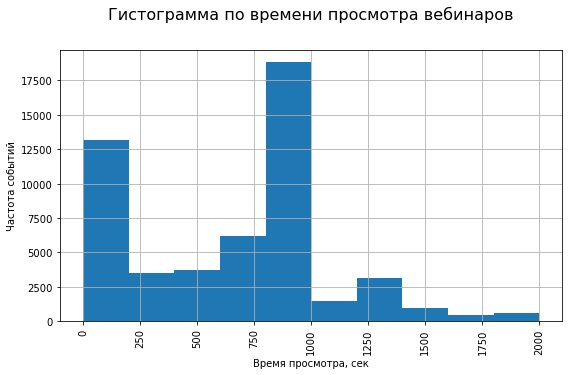

In [118]:
plt.figure(figsize=(9,5))
df_time_view['time_view_ev'].hist(range=(0,2000))
plt.xlabel('Время просмотра, сек')
plt.ylabel('Частота событий')
plt.title('Гистограмма по времени просмотра вебинаров', fontsize=16, pad=30)
plt.xticks(rotation = 90);

В основном участники слушают доклады по 15 мин.

Оставим только те посещения, где время просмотра мероприятия больше или равно половине продолжительности мероприятия по расписанию.

In [119]:
df_final= df_time_view.query('time_view_ev >= duration/2')

In [120]:
df_final.shape

(34993, 14)

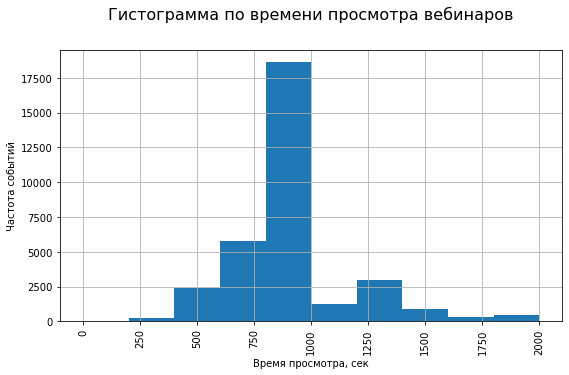

In [121]:
plt.figure(figsize=(9,5))
df_final['time_view_ev'].hist(range=(0,2000))
plt.xlabel('Время просмотра, сек')
plt.ylabel('Частота событий')
plt.title('Гистограмма по времени просмотра вебинаров', fontsize=16, pad=30)
plt.xticks(rotation = 90);

У нас автоматически отсеялись просмотры от 0 до 3 мин

In [122]:
# добавим поле с годом мероприятия
df_final['year'] = pd.DatetimeIndex(df_final['date']).year

In [123]:
df_final['event'].value_counts()

VIII Петербургский международный онкологический форум Белые ночи                                                                         27505
IX Петербургский международный онкологический форум Белые ночи                                                                            5789
Рак эндометрия. Без прошлого нет будущего                                                                                                  821
Плоскодетекторная компьютерная томография в интервенционной онкологии                                                                      419
I Мультидисциплинарная международная конференция                                                                                           220
Лечение злокачественных новообразований головы и шеи                                                                                       170
Школа криогенных технологий. Криохирургические технологии в лечении базальноклеточного рака кожи: эпидемиология, диагностика, лечение       47

Создадим отдельный датафрейм для небольших мероприятий и для форумов.

In [124]:
events = df_final[df_final['event_type'] == 'small events']
forums = df_final[df_final['event_type'] == 'forum']

Предобработаем датафрейм с рубрикатором мероприятий.

In [125]:
rub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Год                 343 non-null    int64         
 1   Дата                343 non-null    datetime64[ns]
 2   Поток               343 non-null    object        
 3   Начало              343 non-null    object        
 4   Конец               327 non-null    object        
 5   Сессия              343 non-null    object        
 6   Код классификатора  343 non-null    object        
 7   Направление         343 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 21.6+ KB


In [126]:
rub.head()

,Год,Дата,Поток,Начало,Конец,Сессия,Код классификатора,Направление
0,2022,2022-06-27,1 поток,10:00:00,12:00:00,"Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS",Основное,Мультидисциплинарное
1,2022,2022-06-27,1 поток,10:00:00,12:00:00,"Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS",Нозологии,Молочная железа
2,2022,2022-06-27,1 поток,13:00:00,15:00:00,Неоадъювантная терапия РМЖ от А до Я,Основное,Лекарственная терапия
3,2022,2022-06-27,1 поток,13:00:00,15:00:00,Неоадъювантная терапия РМЖ от А до Я,Нозологии,Молочная железа
4,2022,2022-06-27,1 поток,15:30:00,17:25:00,VIII Конференция им. М.Л. Гершановича: сессия по заявкам,Основное,Оргздрав


In [127]:
rub.columns = ['year', 'date', 'potok', 'time_start', 'time_end', 'ses_title', 'code', 'course']

In [128]:
rub['potok'].value_counts()

3 поток     58
1 поток     57
4 поток     50
5 поток     50
2 поток     45
6 поток     28
8 поток     20
7 поток     18
10 поток    12
9 поток      5
Name: potok, dtype: int64

In [129]:
rub['potok'] = rub['potok'].apply(lambda x: x.split(' ')[0])

In [130]:
rub['potok'].value_counts()

3     58
1     57
4     50
5     50
2     45
6     28
8     20
7     18
10    12
9      5
Name: potok, dtype: int64

In [131]:
rub['potok'] = rub['potok'].astype(int)

In [132]:
rub['date_start_rub'] = pd.to_datetime(rub['date'] + pd.to_timedelta(rub['time_start'].astype(str)))
rub['date_end_rub'] = pd.to_datetime(rub['date'] + pd.to_timedelta(rub['time_end'].astype(str)))

In [133]:
rub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            343 non-null    int64         
 1   date            343 non-null    datetime64[ns]
 2   potok           343 non-null    int32         
 3   time_start      343 non-null    object        
 4   time_end        327 non-null    object        
 5   ses_title       343 non-null    object        
 6   code            343 non-null    object        
 7   course          343 non-null    object        
 8   date_start_rub  343 non-null    datetime64[ns]
 9   date_end_rub    327 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int32(1), int64(1), object(5)
memory usage: 25.6+ KB


In [134]:
rub.head()

,year,date,potok,time_start,time_end,ses_title,code,course,date_start_rub,date_end_rub
0,2022,2022-06-27,1,10:00:00,12:00:00,"Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS",Основное,Мультидисциплинарное,2022-06-27 10:00:00,2022-06-27 12:00:00
1,2022,2022-06-27,1,10:00:00,12:00:00,"Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS",Нозологии,Молочная железа,2022-06-27 10:00:00,2022-06-27 12:00:00
2,2022,2022-06-27,1,13:00:00,15:00:00,Неоадъювантная терапия РМЖ от А до Я,Основное,Лекарственная терапия,2022-06-27 13:00:00,2022-06-27 15:00:00
3,2022,2022-06-27,1,13:00:00,15:00:00,Неоадъювантная терапия РМЖ от А до Я,Нозологии,Молочная железа,2022-06-27 13:00:00,2022-06-27 15:00:00
4,2022,2022-06-27,1,15:30:00,17:25:00,VIII Конференция им. М.Л. Гершановича: сессия по заявкам,Основное,Оргздрав,2022-06-27 15:30:00,2022-06-27 17:25:00


In [135]:
df_final.shape

(34993, 15)

Объединим наш датасет с посещением и расписанием с рубрикатором.

In [136]:
forums_rub = df_final.merge(rub[['date', 'potok', 'ses_title', 'code', 'course', 'date_start_rub', 'date_end_rub']], on=['date', 'potok'])

In [138]:
forums_rub.shape

(145263, 20)

In [139]:
# отфильтруем по времени
forums_rub = forums_rub[((forums_rub['date_start'] >= forums_rub['date_start_rub']) & (forums_rub['date_start'] < forums_rub['date_end_rub'])) | 
                ((forums_rub['date_end'] > forums_rub['date_start_rub']) & (forums_rub['date_end'] <= forums_rub['date_end_rub'])) | 
                ((forums_rub['date_start'] <= forums_rub['date_start_rub']) & (forums_rub['date_end'] >= forums_rub['date_end_rub']))]

In [140]:
forums_rub.shape

(47439, 20)

In [141]:
forums_rub.head().T

,2,3,5,6,12
uid,160.0,160.0,160.0,160.0,160.0
city_user,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург
profession,Врач,Врач,Врач,Врач,Врач
specialization,Хирург онколог,Хирург онколог,Хирург онколог,Хирург онколог,Хирург онколог
potok,1.0,1.0,1.0,1.0,1.0
date,2022-06-27 00:00:00,2022-06-27 00:00:00,2022-06-27 00:00:00,2022-06-27 00:00:00,2022-06-27 00:00:00
title,Корреляция клинико-патоморфологических и лучевых параметров при неоадьювантной химиотерапии РМЖ,Корреляция клинико-патоморфологических и лучевых параметров при неоадьювантной химиотерапии РМЖ,Лучевая терапия,Лучевая терапия,Морфологическое исследование при НАХТ
speaker,Бусько Екатерина Александровна,Бусько Екатерина Александровна,Брянцева Жанна Викторовна,Брянцева Жанна Викторовна,Артемьева Анна Сергеевна
duration,900.0,900.0,1200.0,1200.0,900.0
date_start,2022-06-27 13:00:00,2022-06-27 13:00:00,2022-06-27 10:50:00,2022-06-27 10:50:00,2022-06-27 13:20:00


In [142]:
forums_rub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47439 entries, 2 to 145258
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             47439 non-null  float64       
 1   city_user       47439 non-null  object        
 2   profession      47439 non-null  object        
 3   specialization  47439 non-null  object        
 4   potok           47439 non-null  float64       
 5   date            47439 non-null  datetime64[ns]
 6   title           47439 non-null  object        
 7   speaker         47439 non-null  object        
 8   duration        47439 non-null  float64       
 9   date_start      47439 non-null  datetime64[ns]
 10  date_end        47439 non-null  datetime64[ns]
 11  event           47439 non-null  object        
 12  event_type      47439 non-null  object        
 13  time_view_ev    47439 non-null  float64       
 14  year            47439 non-null  int64         
 15  s

## Шаг 3. Анализ данных

Посмотрим на распределение количества участников по дням.

In [143]:
df_date = df_final.groupby('date', as_index=False)['uid'].nunique()
df_date.head()

,date,uid
0,2022-06-27,798
1,2022-06-28,778
2,2022-06-29,705
3,2022-06-30,595
4,2022-09-15,22


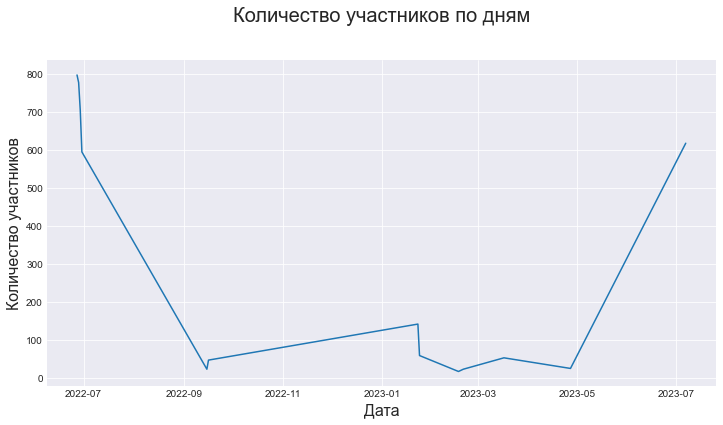

In [144]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))
plt.title('Количество участников по дням', y=1.1, fontsize=20)
plt.ylabel('Количество участников', fontsize=16)
plt.xlabel('Дата', fontsize=16)
sns.lineplot(x='date', y='uid', data=df_date);

Мы видим, что больше всего участников посещает большие форумы.

Посмотрим на количество участников по мероприятиям.

In [145]:
df_ev = df_final.groupby('event', as_index=False)['uid'].nunique().sort_values(by='uid', ascending=False)
df_ev

,event,uid
2,VIII Петербургский международный онкологический форум Белые ночи,1228
1,IX Петербургский международный онкологический форум Белые ночи,618
6,Рак эндометрия. Без прошлого нет будущего,146
4,Лечение злокачественных новообразований головы и шеи,59
5,Плоскодетекторная компьютерная томография в интервенционной онкологии,52
0,I Мультидисциплинарная международная конференция,24
3,Лабораторная диагностика анемий Часть 1,22
7,"Школа криогенных технологий. Криохирургические технологии в лечении базальноклеточного рака кожи: эпидемиология, диагностика, лечение",16


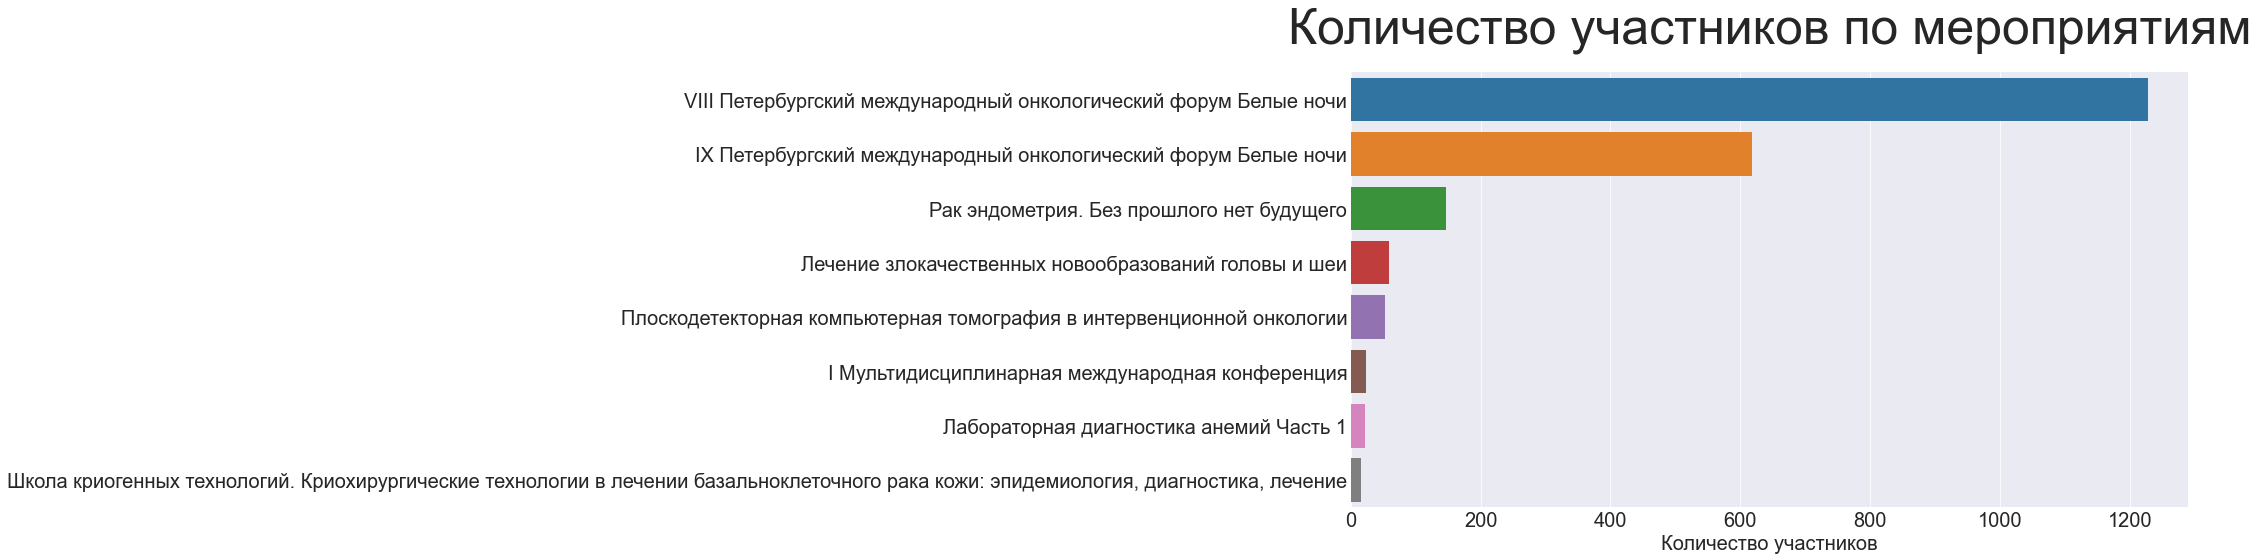

In [146]:
plt.figure(figsize=(15,8))
bar = sns.barplot(x='uid', y='event', data=df_ev)
bar.set_title('Количество участников по мероприятиям', fontdict={'fontsize': 50}, pad=30)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20);

Посмотрим на популярные выступления  и спикеров на форумах.

In [147]:
df_title = forums.groupby('title', as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False).reset_index(drop=True).head(15)
df_title

,title,uid
0,Лучевая терапия,216
1,Совремнные подходы лечения рака молочной железы,208
2,Морфологическое исследование при НАХТ,199
3,Объем хирургического вмешательства на регионарных коллекторах,190
4,Местно-распространенный рак шейки матки: возможности хирургического метода лечения,187
5,Лапароскопия в лечении рака шейки матки. Возможности и перспективы,186
6,Корреляция клинико-патоморфологических и лучевых параметров при неоадьювантной химиотерапии РМЖ,185
7,Есть ли место адъювантной химиотерапии при раке шейки матки,178
8,Клинико-морфологическое обоснование комбинированных методов лечения при повторных циторедуктивных операциях у больных раком яичников,176
9,Ранний рак яичников: стандартное и органосохраняющее лечение,176


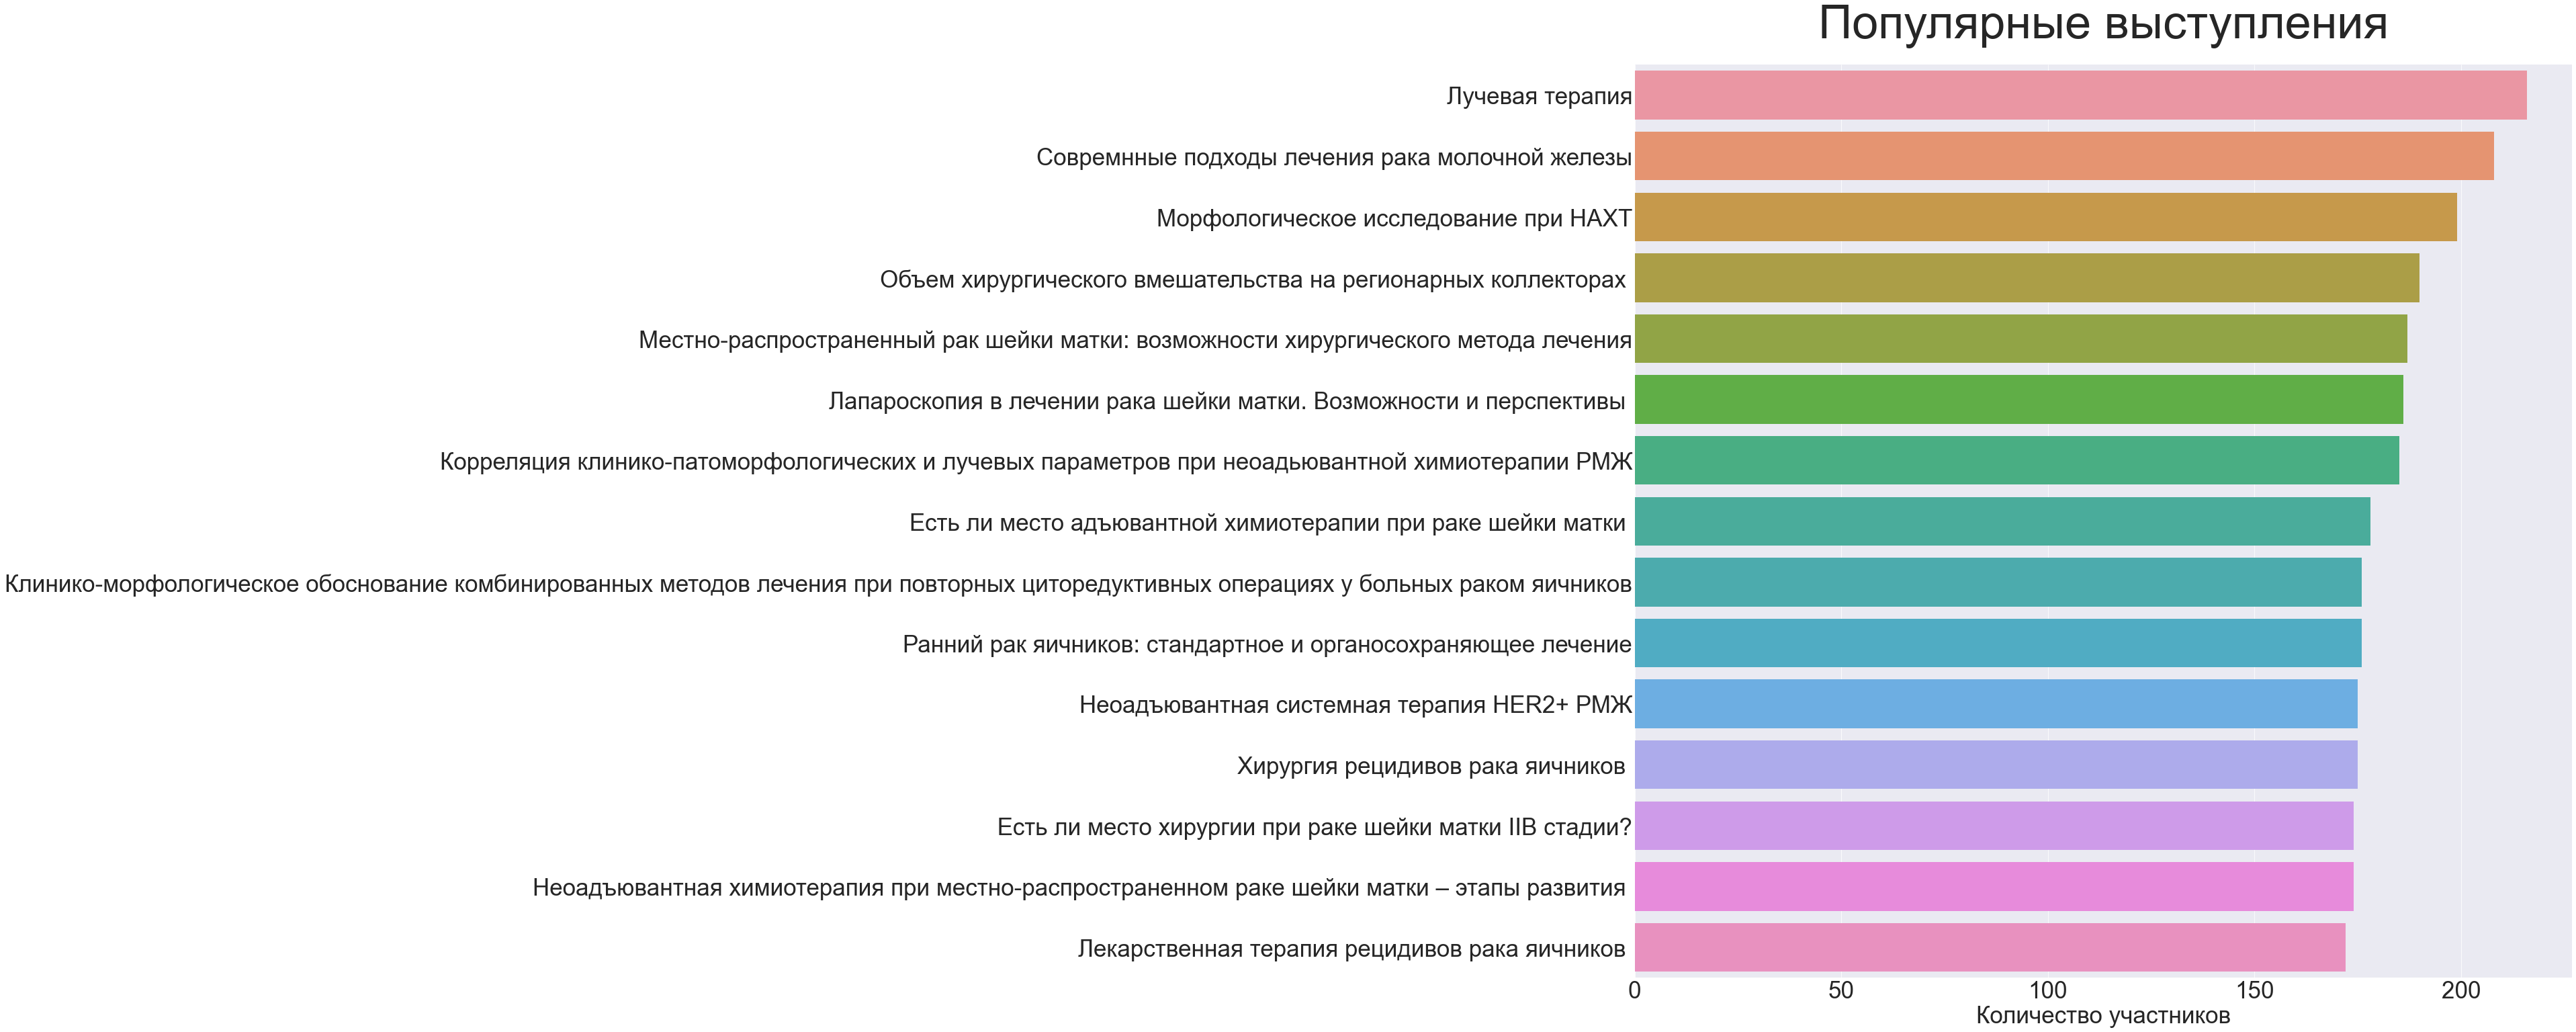

In [148]:
# строим график
plt.figure(figsize=(25, 25))
bar = sns.barplot( y='title', x='uid', data=df_title)
bar.set_title('Популярные выступления', fontdict={'fontsize':70}, pad=40)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=35);

In [151]:
df_speaker = forums.groupby('speaker', as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False).reset_index(drop=True).head(15)
list_speakers = df_speaker['speaker']
df_speaker

,speaker,uid
0,Артемьева Анна Сергеевна,408
1,Семиглазова Татьяна Юрьевна,363
2,Носов Александр Константинович,274
3,Новиков Сергей Николаевич,262
4,Семенова Анна Игоревна,255
5,Имянитов Евгений Наумович,249
6,Колядина Ирина Владимировна,248
7,Хохлова Светлана Викторовна,235
8,Брянцева Жанна Викторовна,234
9,Омельяновский Виталий Владимирович,229


In [152]:
# посмотрим сколько было выступлений у этих спикеров 
df_speaker_cnt = forums.query('speaker in @list_speakers').groupby('speaker', as_index=False).agg({'title': 'nunique'}).sort_values(by='title', ascending=False).reset_index(drop=True)
df_speaker_cnt

,speaker,title
0,Семиглазова Татьяна Юрьевна,12
1,Криворотько Петр Владимирович,8
2,Носов Александр Константинович,8
3,Артемьева Анна Сергеевна,6
4,Проценко Светлана Анатольевна,6
5,Имянитов Евгений Наумович,4
6,Колядина Ирина Владимировна,4
7,Новик Алексей Викторович,4
8,Семенова Анна Игоревна,4
9,Хохлова Светлана Викторовна,4


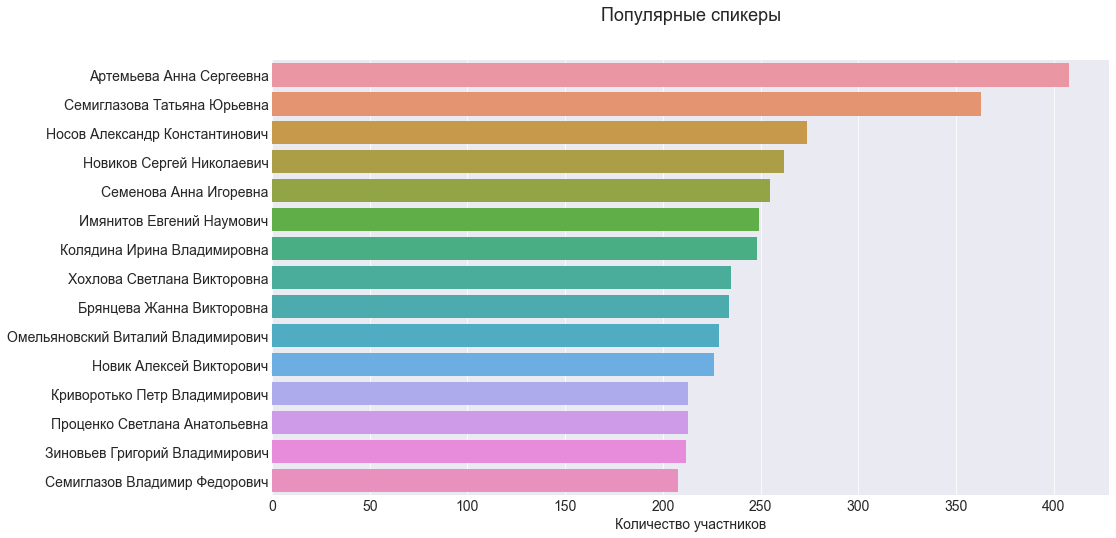

In [153]:
# строим график
plt.figure(figsize=(15, 8))
bar = sns.barplot( y='speaker', x='uid', data=df_speaker)
bar.set_title('Популярные спикеры', fontdict={'fontsize':18}, pad=40)
plt.xlabel('Количество участников', fontsize=14);
bar.set(ylabel=None)
plt.tick_params(axis='both', which='major', labelsize=14);

Проанализируем небольшие мероприятия по докладам и спикерам.

In [154]:
ev_title = events.groupby('title', as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False).reset_index(drop=True).head(15)
ev_title

,title,uid
0,Эндокринология рака эндометрия,106
1,Вклад профессора Я.В. Бохмана в проблему «рака эндометрия»,104
2,Live surgery: Лапароскопический доступ в хирургии рака эндометрия,103
3,Первично-множественные злокачественные заболевания в онкогинекологии,99
4,Инновации в хирургии рака эндометрия,98
5,Детекция сигнальных лимфатических узлов при раке эндометрия,93
6,Инновации в консервативном лечении рака эндометрия у молодых,87
7,Инновации в лекарственной терапии рака эндометрия,86
8,Возможности использования технологий плоскодетекторной компьютерной томографии в многопрофильном онкологическом стационаре,36
9,Трансляция из рентгеноперационной: возможности плоскодетекторной компьютерной томографии для диагностики злокачественных опухолей печени,32


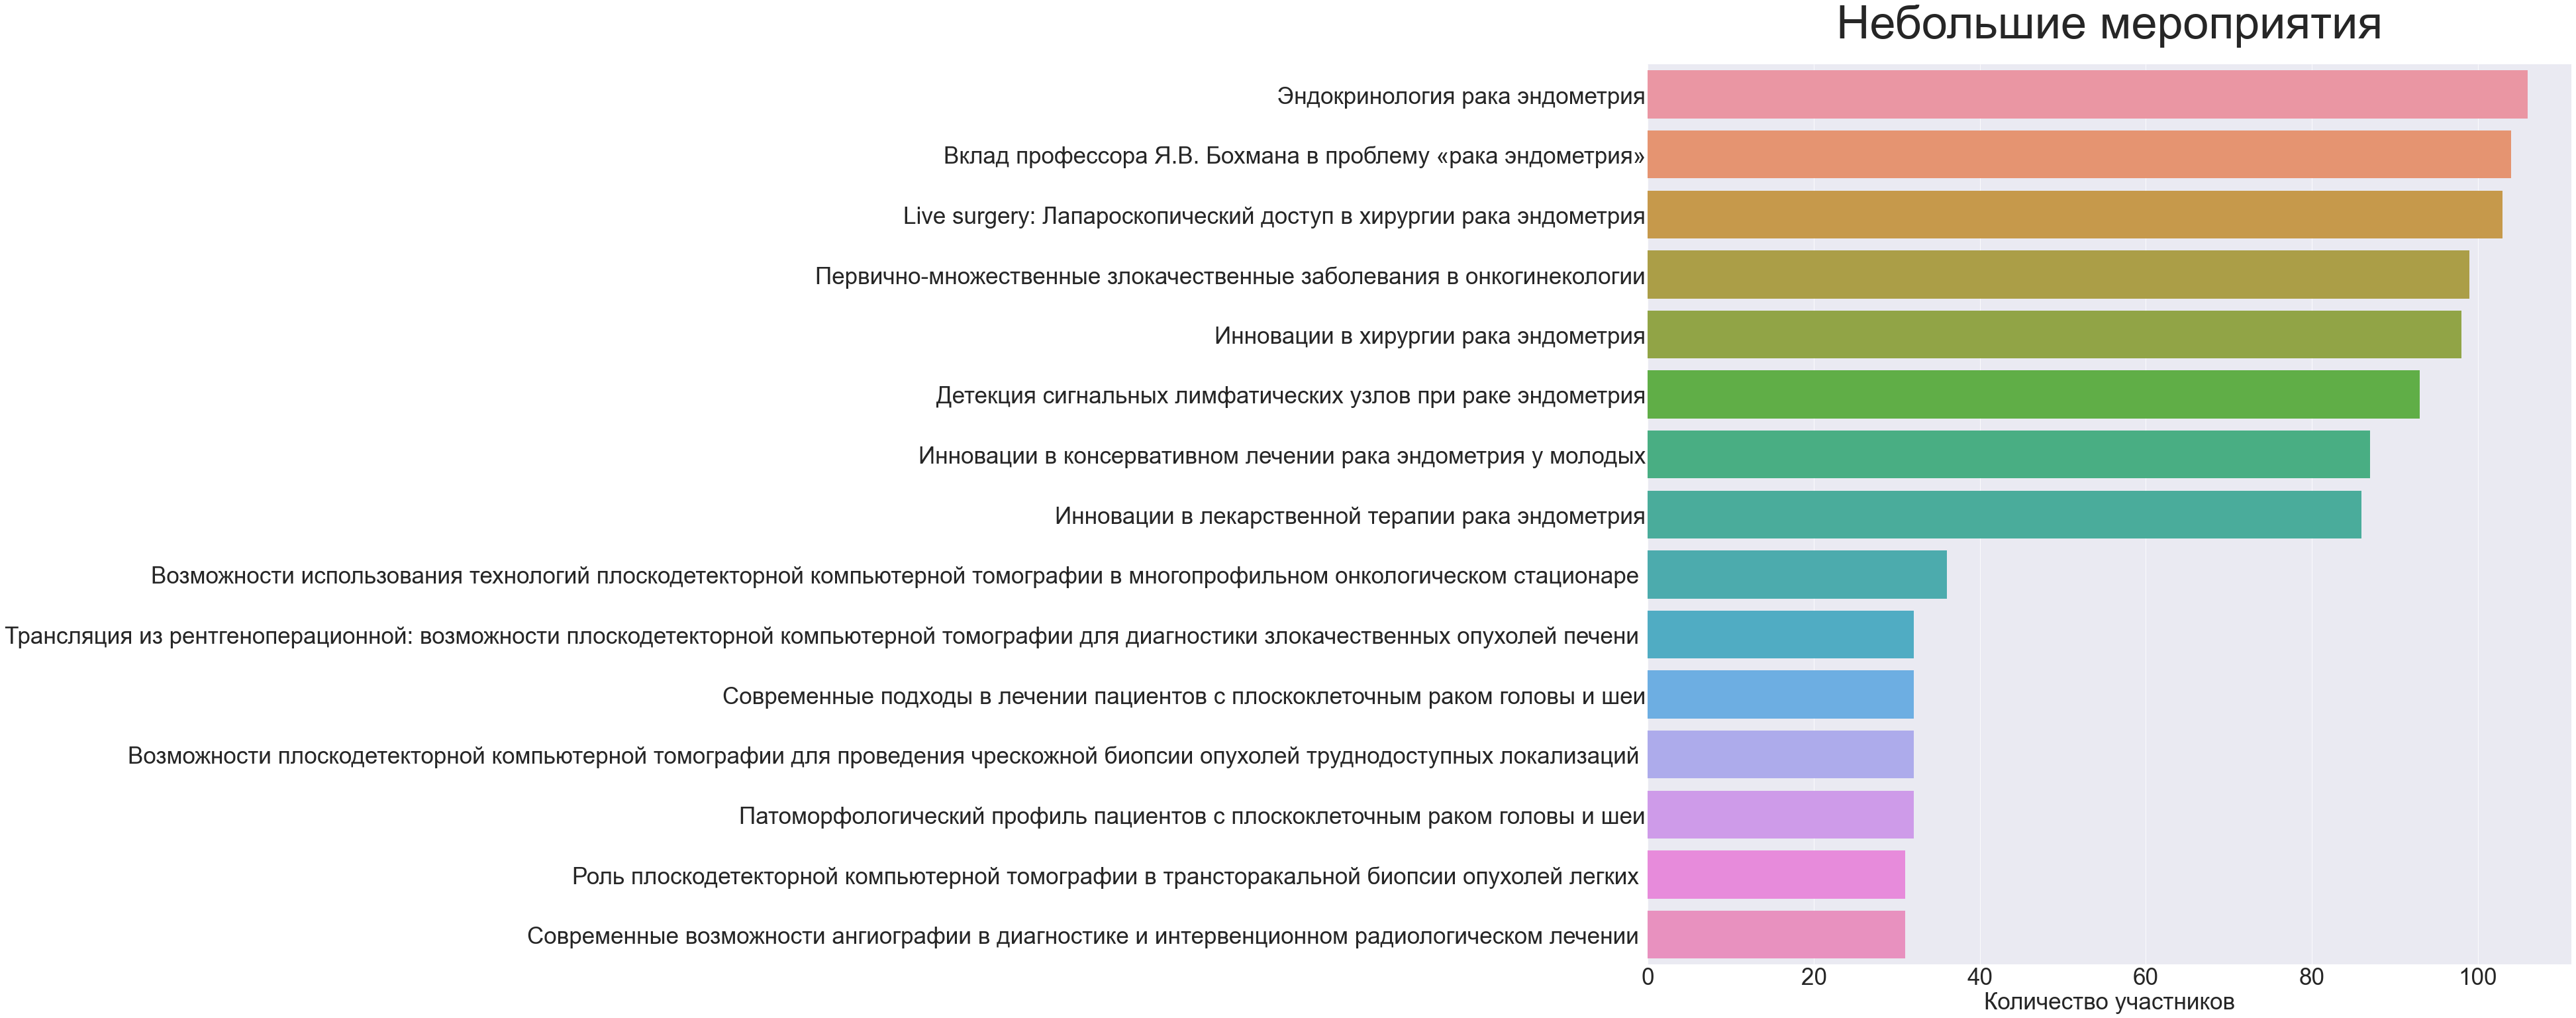

In [155]:
# строим график
plt.figure(figsize=(25, 25))
bar = sns.barplot( y='title', x='uid', data=ev_title)
bar.set_title('Небольшие мероприятия', fontdict={'fontsize':70}, pad=40)
plt.xlabel('Количество участников', fontsize=35);
bar.set(ylabel=None)
plt.tick_params(axis='both', which='major', labelsize=35);

In [160]:
ev_speaker = events.groupby('speaker', as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False).reset_index(drop=True).head(15)
list_ev_speakers = ev_speaker['speaker']
ev_speaker

,speaker,uid
0,Берлев Игорь Викторович,134
1,Берштейн Лев Михайлович,106
2,Бахидзе Елена Вилльевна,104
3,Максимов Сергей Янович,99
4,Смирнова Ольга Алексеевна,93
5,Сидорук Анна Александровна,87
6,Ульрих Елена Александровна,86
7,Раджабова Замираа Ахмедовна,45
8,Шмелев Алексей Станиславович,39
9,Балахнин Павел Васильевич,38


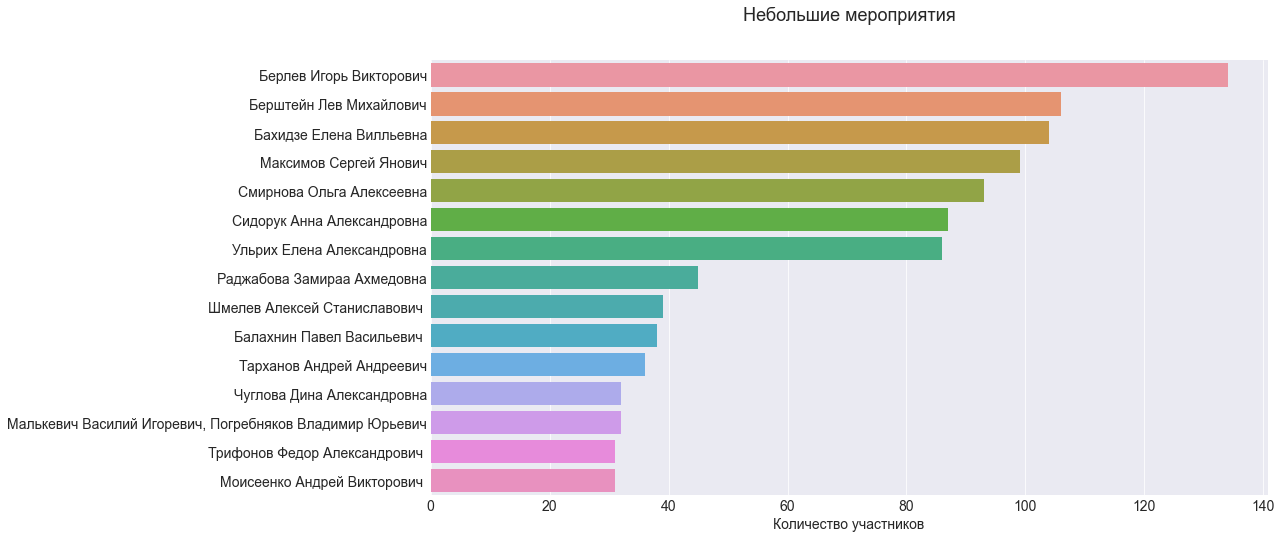

In [157]:
# строим график
plt.figure(figsize=(15, 8))
bar = sns.barplot( y='speaker', x='uid', data=ev_speaker)
bar.set_title('Небольшие мероприятия', fontdict={'fontsize':18}, pad=40)
plt.xlabel('Количество участников', fontsize=14);
bar.set(ylabel=None)
plt.tick_params(axis='both', which='major', labelsize=14);

In [161]:
ev_speaker_cnt = events.query('speaker in @list_ev_speakers').groupby('speaker', as_index=False).agg({'title': 'nunique'}).sort_values(by='title', ascending=False).reset_index(drop=True)
ev_speaker_cnt

,speaker,title
0,Шмелев Алексей Станиславович,3
1,Балахнин Павел Васильевич,2
2,Берлев Игорь Викторович,2
3,Раджабова Замираа Ахмедовна,2
4,Бахидзе Елена Вилльевна,1
5,Берштейн Лев Михайлович,1
6,Максимов Сергей Янович,1
7,"Малькевич Василий Игоревич, Погребняков Владимир Юрьевич",1
8,Моисеенко Андрей Викторович,1
9,Сидорук Анна Александровна,1


Посмотрим на популярные выступления и спикеров по годам.

In [162]:
df_title_22 = forums[forums['year'] == 2022].groupby('title', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)
df_title_23 = forums[forums['year'] == 2023].groupby('title', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)
df_speaker_22 = forums[forums['year'] == 2022].groupby('speaker', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)
df_speaker_23 = forums[forums['year'] == 2023].groupby('speaker', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)

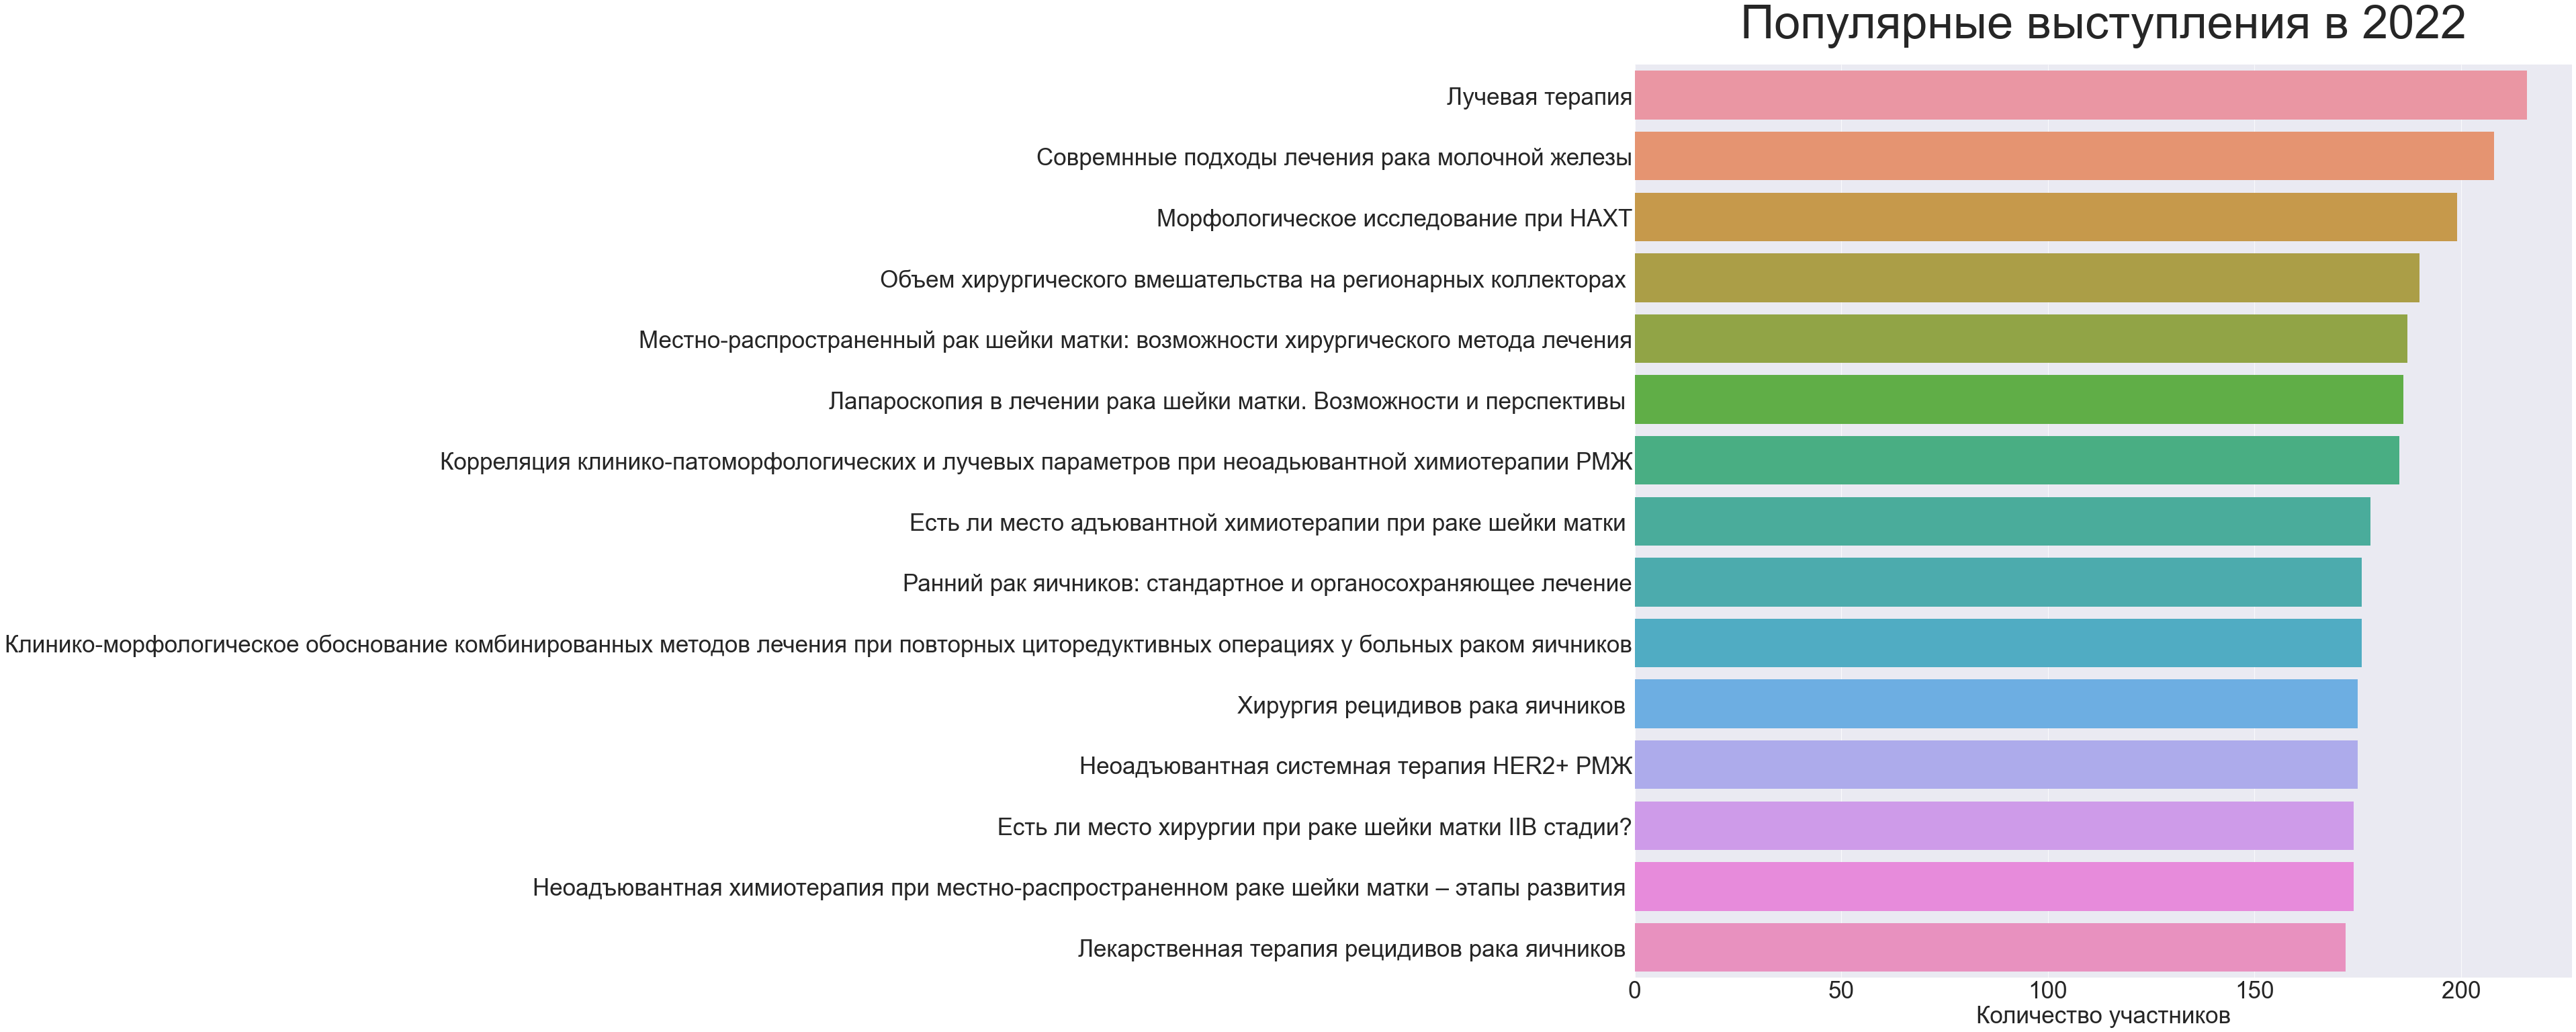

In [163]:
# строим график
plt.figure(figsize=(25, 25))
bar = sns.barplot( y='title', x='uid', data=df_title_22)
bar.set_title('Популярные выступления в 2022', fontdict={'fontsize':70}, pad=40)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=35);

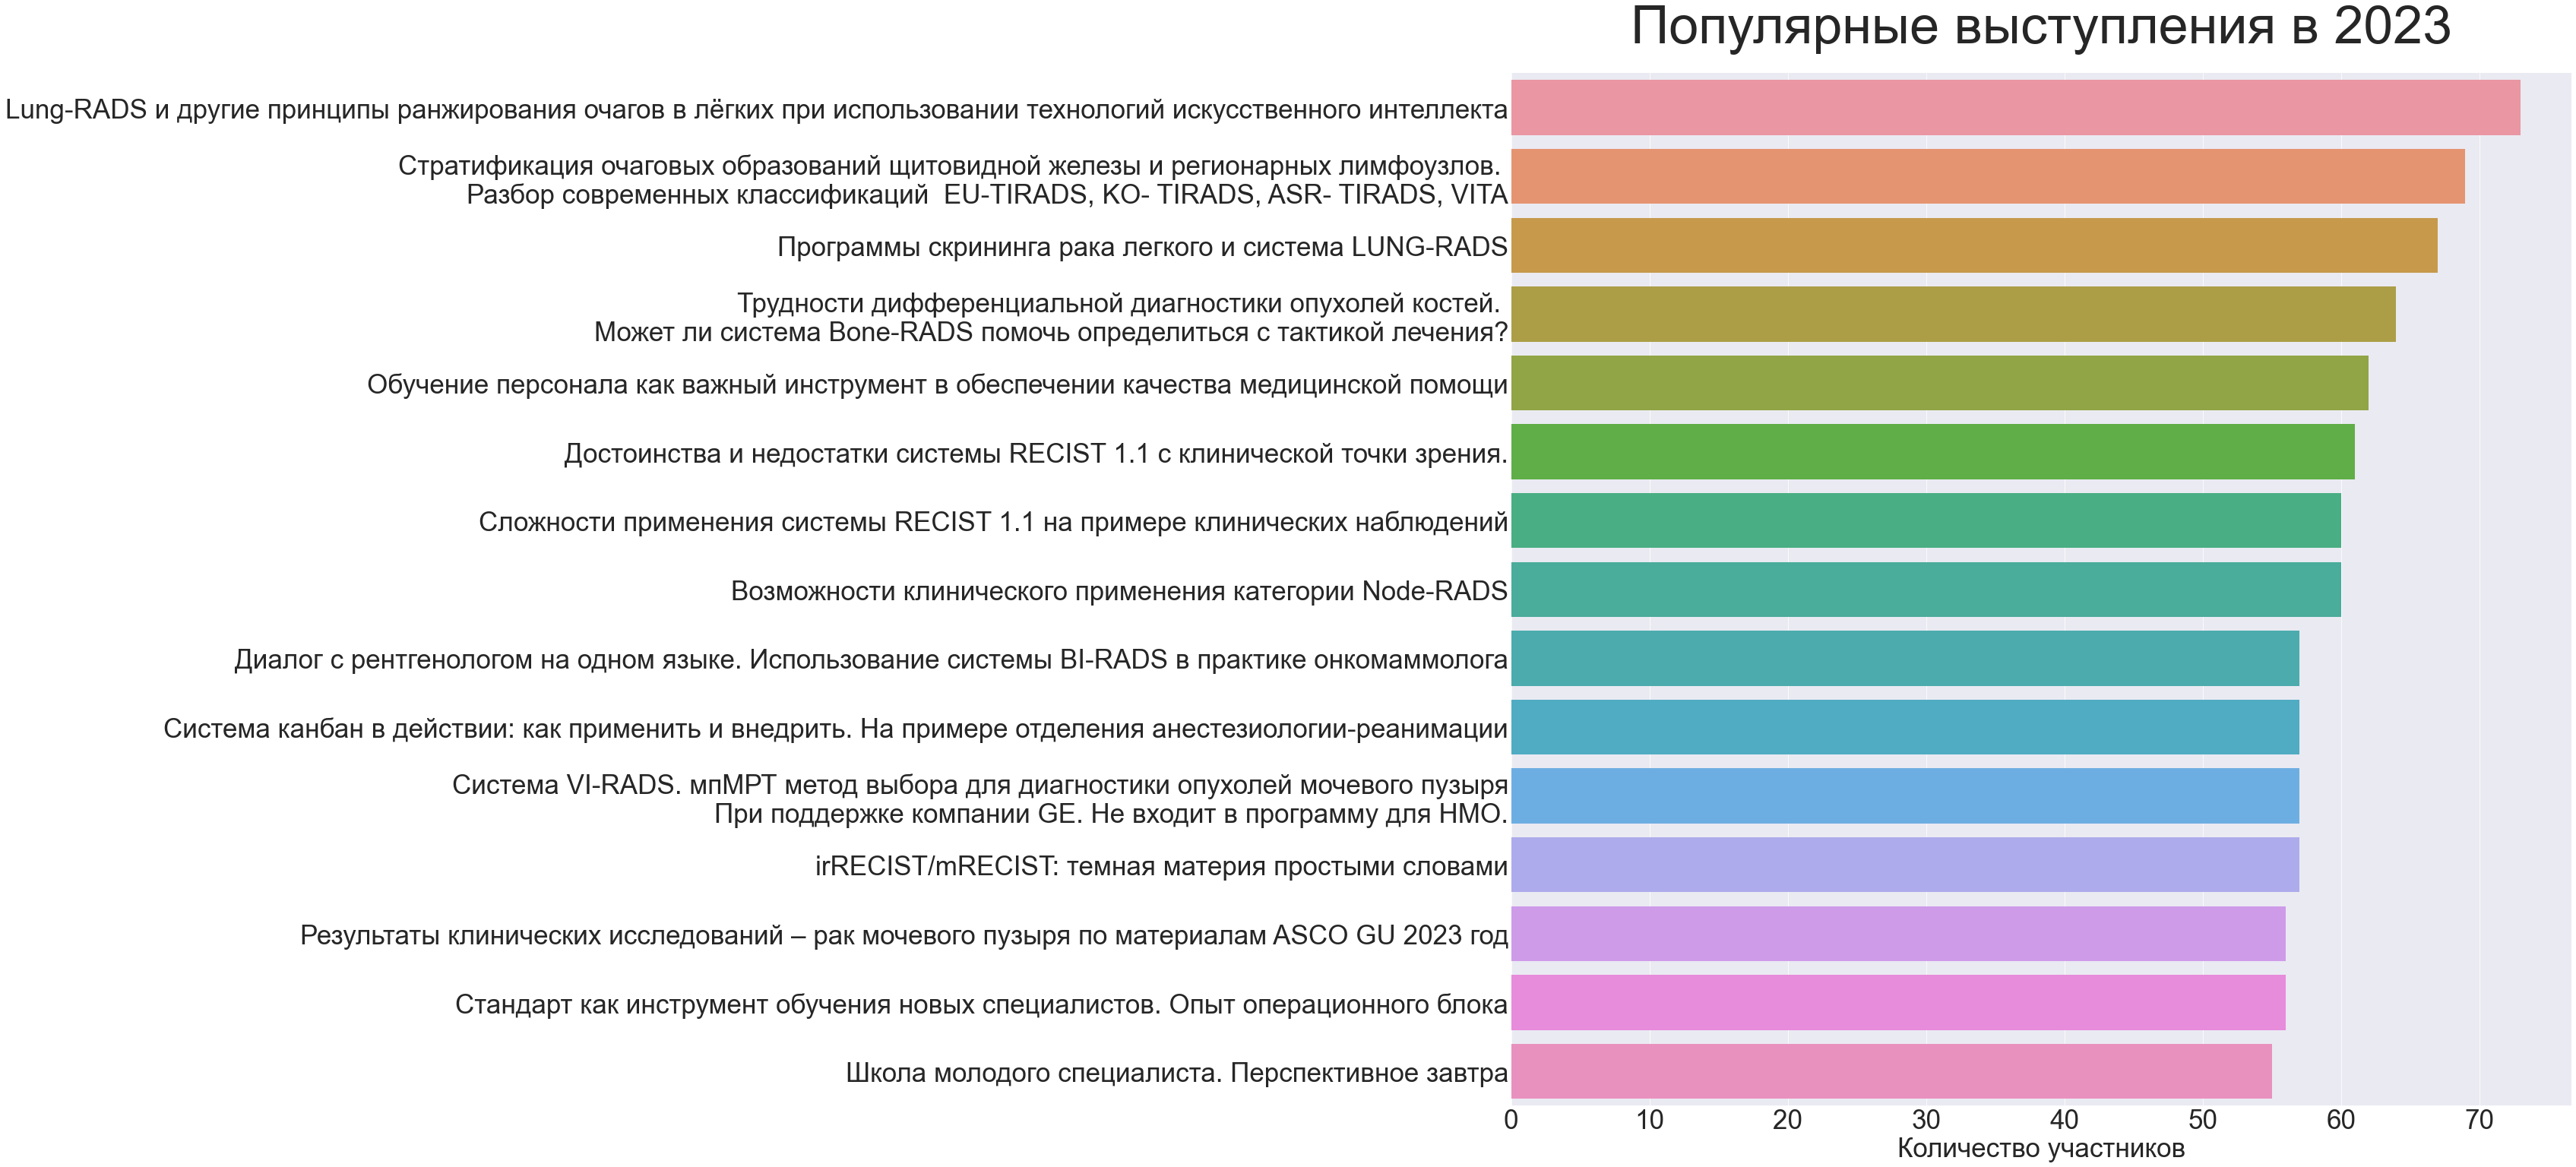

In [164]:
# строим график
plt.figure(figsize=(25, 25))
bar = sns.barplot( y='title', x='uid', data=df_title_23)
bar.set_title('Популярные выступления в 2023', fontdict={'fontsize':70}, pad=40)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=35);

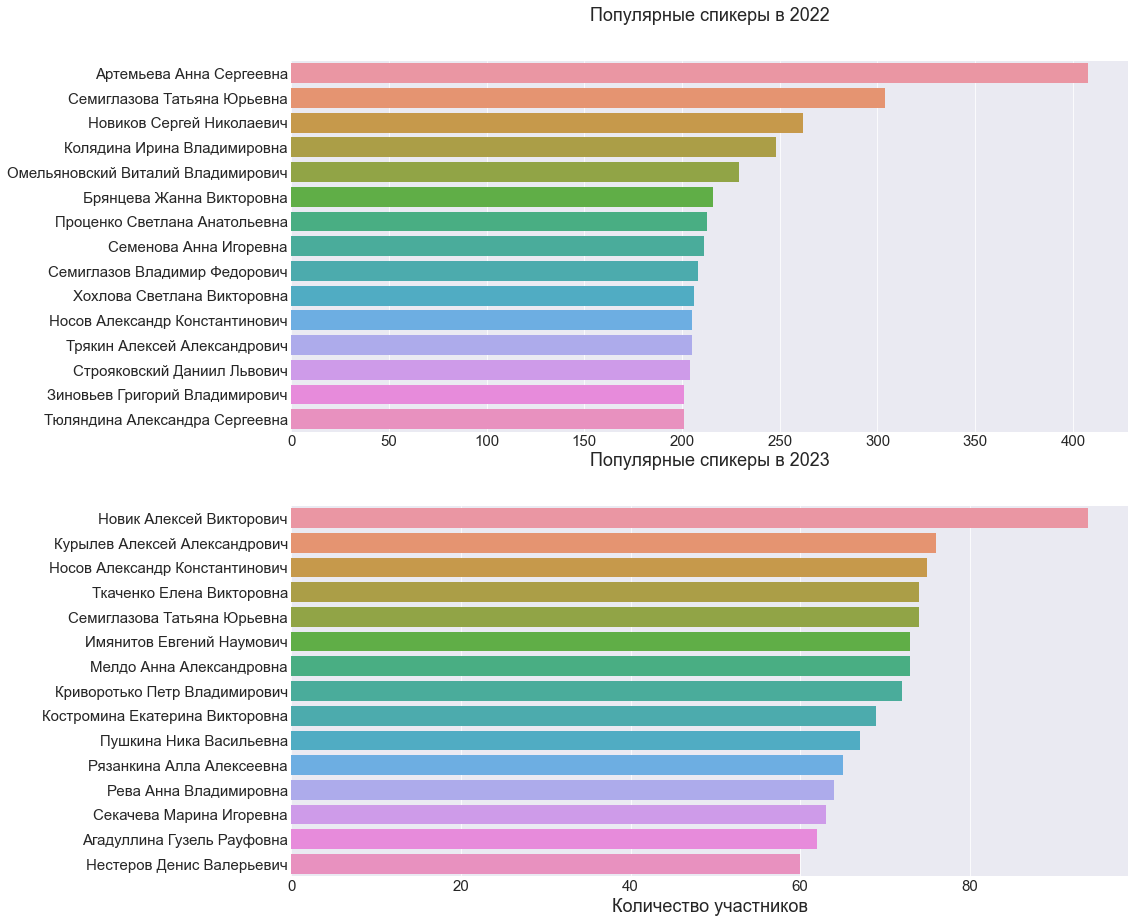

In [168]:
# строим график
fig, axes = plt.subplots(2, 1,figsize=(15, 15))
sns.barplot( y='speaker', x='uid', data=df_speaker_22, ax=axes[0])
axes[0].set_title('Популярные спикеры в 2022', fontdict={'fontsize':18}, pad=40)
axes[0].set(ylabel=None)
axes[0].set(xlabel=None)
#plt.xlabel('Количество участников', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=15)
sns.barplot( y='speaker', x='uid', data=df_speaker_23, ax=axes[1])
axes[1].set_title('Популярные спикеры в 2023', fontdict={'fontsize':18}, pad=40)
axes[1].set(ylabel=None)
plt.xlabel('Количество участников', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=15);

In [169]:
# посмотрим на количество участников по годам
df_year = df_final.groupby('year', as_index=False).agg({'uid':'nunique'})

In [170]:
df_year

,year,uid
0,2022,1269
1,2023,825


In [173]:
fig = go.Figure(
    data=[go.Pie(labels=df_year['year'],
                 values=df_year['uid'],
                 )
         ]
)
fig.update_layout(
    title={
        'text': 'Число участников по годам',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title='Год',
    font=dict(
        family="Times New Roman",
        size=15,
        color="RebeccaPurple"
    )
)
fig.show();

Посмотрим на популярные направления в рамках форумов.

In [174]:
df_course = forums_rub.groupby('course', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)
df_course

,course,uid
5,Лекарственная терапия,915
11,Мультидисциплинарное,878
24,Хирургия,731
10,Молочная железа,699
12,Оргздрав,505
19,Реабилитация,297
18,Рак яичника,287
3,Клинические исследования,282
22,Сопроводительная терапия,263
26,Шейка матки,259


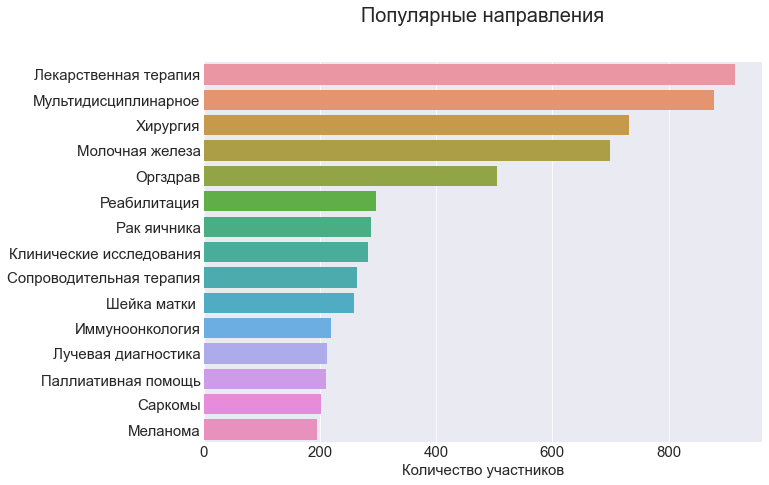

In [175]:
plt.figure(figsize=(10, 7))
bar = sns.barplot(y='course', x='uid', data=df_course)
bar.set_title('Популярные направления', fontdict={'fontsize':20}, pad=40)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15);

## Шаг 4. Проектирование дашборда

In [207]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H1(children = 'Анализ трансляций НМИЦ онкологии им Н.Н. Петрова'),
    
    html.Div('''
   Данный дашборд позволяет определить наиболее интересные темы вебинаров, посвященных новым технологиям и методам в сфере лечения онкологии, и популярных спикеров
   в НМИЦ им. Н.Н. Петрова.
''', style={
        'textAlign': 'left',
        'color': '#141E46'
    } ),
    
    dcc.Tabs(id='tabs', value='tab-1', children=[
        dcc.Tab(label='Форумы', value='tab-1'),
        dcc.Tab(label='Небольшие мероприятия', value='tab-2'),
    ]),
 
    html.Div(id='tabs-content')
])

@app.callback(
    Output('tabs-content', 'children'),
    Input('tabs', 'value')
)
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([

        html.Label('Временной период:'),

        dcc.DatePickerRange(
            min_date_allowed=df_final['date'].min(),
            max_date_allowed=df_final['date'].max(),
            initial_visible_month=df_final['date'].min(),
            start_date=df_final['date'].min(),
            end_date=df_final['date'].max(),
            id='dt_selector',
        ), 
        html.Br(),
        html.Br(),

        dcc.Dropdown(
        id="events-dropdown",
        options=forums['event'].unique(),
        value=forums['event'].unique(),
        clearable=True,
        multi=True
        ), 
            
        html.Br(),
        # график 
          
        dcc.Graph(
            figure = {},      
            id = 'bar_id'
            ),
            
        html.Div(   
        dcc.Graph(
                figure = {},      
                id = 'bar1_id'
            ), 
        style={'width': '59%', 'display': 'inline-block'}
        ),
            
        html.Div(   
        dcc.Graph(
                figure = {},      
                id = 'bar2_id'
            ), 
        style={'width': '39%', 'display': 'inline-block'}
        ),
        
        dcc.Graph(
                figure = {},      
                id = 'bar3_id'
            ),   
        dcc.Graph(
                figure = {},      
                id = 'bar4_id'
            ), 
    ])
    elif tab == 'tab-2':
         return html.Div([

        html.Label('Временной период:'),

        dcc.DatePickerRange(
            min_date_allowed=events['date'].min(),
            max_date_allowed=events['date'].max(),
            initial_visible_month=events['date'].min(),
            start_date=events['date'].min(),
            end_date=events['date'].max(),
            id='dt_selector_2',
        ), 
        html.Br(),
        html.Br(),

        dcc.Dropdown(
            id='events-dropdown_2',
            options=events['event'].unique(),
            value=events['event'].unique(),
            clearable=True,
            multi=True
        ),      
        # график 
        dcc.Graph(
            figure = {},      
            id = 'bar_id_2'
            ),  

        html.Div(   
        dcc.Graph(
                figure = {},      
                id = 'bar1_id_2'
            ), 
        style={'width': '59%', 'display': 'inline-block'}
        ),
            
        html.Div(   
        dcc.Graph(
                figure = {},      
                id = 'bar2_id_2'
            ), 
        style={'width': '39%', 'display': 'inline-block'}
        ),

        dcc.Graph(
        figure = {},      
        id = 'bar3_id_2'
        )
    ])
@app.callback(
    [Output('bar_id', 'figure'), 
     Output('bar1_id', 'figure'),
     Output('bar2_id', 'figure'),
     Output('bar3_id', 'figure'),
     Output('bar4_id', 'figure'),
    ],
    [Input('dt_selector', 'start_date'),
     Input('dt_selector', 'end_date'),
     Input('events-dropdown', 'value'),
    ])

def update_figures(start_date, end_date, event):
   
    # применяем фильтрацию
    df_title = forums.query('date >= @start_date and date <= @end_date and event in @event').groupby('title', as_index=False).agg(
        {'uid': 'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    df_speaker = forums.query('date >= @start_date and date <= @end_date and event in @event').groupby('speaker', as_index=False).agg(
        {'uid': 'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    speakers = df_speaker['speaker']
    df_speaker_cnt = forums.query('date >= @start_date and date <= @end_date and event in @event and speaker in @speakers').groupby(
        'speaker', as_index=False).agg({'title': 'nunique'}).sort_values(by='title', ascending=False).sort_values(by='title', ascending=True)
    df_course = forums_rub.query('date >= @start_date and date <= @end_date and event in @event').groupby('course', as_index=False).agg(
        {'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    df_event = forums.query('date >= @start_date and date <= @end_date and event in @event').groupby(
        'event', as_index=False)['uid'].nunique().sort_values(by='uid', ascending=True)
    
    fig = px.bar(df_title, x = 'uid', y = 'title', title = 'Топ-15 выступлений',
                 labels={
                     "uid": "Количество участников",
                     "title": "Выступление"
                 },
                 text='uid'
                )
    fig.update_layout(
        title='Топ-15 выступлений',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )

    fig1 = px.bar(df_speaker, x = 'uid', y = 'speaker', title = 'Топ-15 спикеров',
                  labels={
                      "uid": "Количество участников",
                      "speaker": "Ведущий"
                  },
                  text='uid')
    fig1.update_layout(
        title='Топ-15 спикеров',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )
    
    fig2 = px.bar(df_speaker_cnt, x = 'title', y = 'speaker', title = 'Топ-15 направлений',
              labels={
                 "title": "Количество выступлений",
                  "speaker": "Спикер"
              },
              text='title',
             )
    fig2.update_layout(
        title='Количество докладов у топ-спикеров',
        xaxis=dict(
            title='Количество докладов',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )
    
    fig3 = px.bar(df_course, x = 'uid', y = 'course', title = 'Топ-15 направлений',
                  labels={
                     "uid": "Количество участников",
                      "course": "Направление"
                  },
                  text='uid',
                 )
    fig3.update_layout(
        title='Топ-15 направлений',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )
    fig4 = go.Figure(data=go.Pie(labels=df_event['event'],
                 values=df_event['uid'])
                    )
    fig4.update_layout(
    title={
        'text': 'Число участников по форумам',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title='Мероприятие',
    font=dict(
        family="Times New Roman",
        size=15,
        color="RebeccaPurple")
    )
    
    return fig, fig1, fig2, fig3, fig4

@app.callback(
    [Output('bar_id_2', 'figure'), 
     Output('bar1_id_2', 'figure'),
     Output('bar2_id_2', 'figure'),
     Output('bar3_id_2', 'figure'),
    ],
    [Input('dt_selector_2', 'start_date'),
     Input('dt_selector_2', 'end_date'), 
     Input('events-dropdown_2', 'value'),
    ])

def update_figures_2(start_date, end_date, event):
    
    # применяем фильтрацию
    df_title = events.query('date >= @start_date and date <= @end_date and event in @event').groupby('title', as_index=False).agg(
        {'uid': 'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    df_speaker = events.query('date >= @start_date and date <= @end_date and event in @event').groupby('speaker', as_index=False).agg(
        {'uid': 'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    speakers = df_speaker['speaker']
    df_speaker_cnt = events.query('date >= @start_date and date <= @end_date and event in @event and speaker in @speakers').groupby(
        'speaker', as_index=False).agg({'title': 'nunique'}).sort_values(by='title', ascending=False).head(15).sort_values(by='title', ascending=True)
    df_event = events.query('date >= @start_date and date <= @end_date and event in @event').groupby('event', as_index=False).agg(
     {'uid': 'nunique'}).sort_values(by='uid', ascending=True)

    fig = px.bar(df_title, x = 'uid', y = 'title', title = 'Топ-15 выступлений',
                 labels={
                     "uid": "Количество участников",
                     "title": "Выступление"
                 },
                 text='uid'
                )
    fig.update_layout(
        title='Топ-15 выступлений',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )

    fig1 = px.bar(df_speaker, x = 'uid', y = 'speaker', title = 'Топ-15 спикеров',
                  labels={
                      "uid": "Количество участников",
                      "speaker": "Ведущий"
                  },
                  text='uid')
    fig1.update_layout(
        title='Топ-15 спикеров',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )
    fig2 = px.bar(df_speaker_cnt, x = 'title', y = 'speaker', title = 'Рейтинг мероприятий',
       labels={
           "title": "Количество выступлений",
           "speaker": "Спикер"
       },
       text='title')
    fig2.update_layout(
         title='Количество докладов у топ-спикеров',
         xaxis=dict(
             title='Количество докладов',
             titlefont_size=12,
             tickfont_size=12,
            ),
            yaxis_title=None,
            )
    fig3 = px.bar(df_event, x = 'uid', y = 'event', title = 'Рейтинг мероприятий',
           labels={
               "uid": "Количество участников",
               "event": "Мероприятие"
           },
           text='uid')
    fig3.update_layout(
         title='Рейтинг мероприятий',
         xaxis=dict(
             title='Количество участников',
             titlefont_size=12,
             tickfont_size=12,
            ),
            yaxis_title=None,
            )
    return fig, fig1, fig2, fig3

app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


## Шаг 5. Сегментация участников на основе просмотра мероприятий

In [186]:
forums_rub.head()

,uid,city_user,profession,specialization,potok,date,title,speaker,duration,date_start,date_end,event,event_type,time_view_ev,year,ses_title,code,course,date_start_rub,date_end_rub
2,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Корреляция клинико-патоморфологических и лучевых параметров при неоадьювантной химиотерапии РМЖ,Бусько Екатерина Александровна,900.0,2022-06-27 13:00:00,2022-06-27 13:15:00,VIII Петербургский международный онкологический форум Белые ночи,forum,900.0,2022,Неоадъювантная терапия РМЖ от А до Я,Основное,Лекарственная терапия,2022-06-27 13:00:00,2022-06-27 15:00:00
3,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Корреляция клинико-патоморфологических и лучевых параметров при неоадьювантной химиотерапии РМЖ,Бусько Екатерина Александровна,900.0,2022-06-27 13:00:00,2022-06-27 13:15:00,VIII Петербургский международный онкологический форум Белые ночи,forum,900.0,2022,Неоадъювантная терапия РМЖ от А до Я,Нозологии,Молочная железа,2022-06-27 13:00:00,2022-06-27 15:00:00
5,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Лучевая терапия,Брянцева Жанна Викторовна,1200.0,2022-06-27 10:50:00,2022-06-27 11:10:00,VIII Петербургский международный онкологический форум Белые ночи,forum,1080.0,2022,"Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS",Основное,Мультидисциплинарное,2022-06-27 10:00:00,2022-06-27 12:00:00
6,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Лучевая терапия,Брянцева Жанна Викторовна,1200.0,2022-06-27 10:50:00,2022-06-27 11:10:00,VIII Петербургский международный онкологический форум Белые ночи,forum,1080.0,2022,"Разбор стандартов местно-регионарного лечения РМЖ АОР, NCCN, CEEBCS",Нозологии,Молочная железа,2022-06-27 10:00:00,2022-06-27 12:00:00
12,160.0,Санкт-Петербург,Врач,Хирург онколог,1.0,2022-06-27,Морфологическое исследование при НАХТ,Артемьева Анна Сергеевна,900.0,2022-06-27 13:20:00,2022-06-27 13:35:00,VIII Петербургский международный онкологический форум Белые ночи,forum,900.0,2022,Неоадъювантная терапия РМЖ от А до Я,Основное,Лекарственная терапия,2022-06-27 13:00:00,2022-06-27 15:00:00


Посчитаем сколько выступлений прослушали пользователи по направлениям.

In [187]:
forums_course = forums_rub.groupby(['uid', 'course'], as_index=False)['title'].count()
forums_course.columns = ['uid', 'course', 'course_cnt']
forums_course

,uid,course,course_cnt
0,160.0,Лекарственная терапия,6
1,160.0,Молочная железа,9
2,160.0,Мультидисциплинарное,3
3,183.0,Лёгкое,17
4,183.0,Хирургия,17
...,...,...,...
7454,22637.0,Оргздрав,1
7455,22637.0,Плоскоклеточный рак,1
7456,22637.0,Реабилитация,2
7457,22637.0,Хирургия,1


Найдем приоритетные направления для каждого пользователя.

In [189]:
forums_max = forums_course.loc[forums_course.groupby('uid')['course_cnt'].idxmax()]
forums_max 

,uid,course,course_cnt
1,160.0,Молочная железа,9
3,183.0,Лёгкое,17
5,230.0,Лучевая диагностика,14
6,243.0,Мультидисциплинарное,6
10,256.0,Лучевая диагностика,19
...,...,...,...
7449,22579.0,Реабилитация,9
7450,22608.0,Лекарственная терапия,3
7451,22615.0,Лекарственная терапия,2
7453,22637.0,Лучевая диагностика,2


Выделим список активных слушателей для каждого направления, чтобы в будущем их можно было информировать о предстоящих мероприятиях по данным направлениям.

In [195]:
course_segment = forums_max.astype(str).groupby('course', as_index=False)['uid'].agg(lambda x: ','.join(x.unique()))

In [202]:
course_segment.head()

,course,uid
0,Абдоминальная онкология,"1230.0,7285.0,14818.0,14858.0,14860.0,15661.0,15720.0,15754.0,15757.0"
1,Герминогенные опухоли,"6352.0,15062.0,15451.0"
2,Иммуноонкология,"1128.0,1644.0,1661.0,2174.0,3586.0,3795.0,3879.0,4105.0,4144.0,5266.0,5758.0,5950.0,5953.0,6114.0,7006.0,9540.0,9973.0,11454.0,11903.0,13698.0,13726.0,13787.0,14290.0,14304.0,14316.0,14543.0,14802..."
3,Клинические исследования,"676.0,852.0,856.0,948.0,1019.0,1060.0,1302.0,1394.0,1643.0,1803.0,1834.0,1854.0,2228.0,2274.0,2623.0,2835.0,3189.0,3469.0,3896.0,3973.0,4373.0,4662.0,4984.0,5073.0,5079.0,5123.0,5142.0,5204.0,5281..."
4,Колоректальный рак,"730.0,878.0,880.0,1001.0,10040.0,14192.0,14325.0,14741.0,15570.0,15687.0"


Также можно выделить общий список слушателей для каждого направления.

In [201]:
course_segment_general = forums_course.astype(str).groupby('course', as_index=False)['uid'].agg(lambda x: ','.join(x.unique()))
course_segment_general.head()

,course,uid
0,Абдоминальная онкология,"266.0,358.0,444.0,560.0,574.0,624.0,745.0,787.0,1083.0,1090.0,1128.0,1149.0,1230.0,1303.0,1335.0,1348.0,1693.0,1833.0,1837.0,2177.0,2412.0,2509.0,2659.0,2812.0,2876.0,3004.0,3015.0,3178.0,3188.0,3..."
1,Герминогенные опухоли,"266.0,287.0,574.0,638.0,689.0,778.0,790.0,888.0,899.0,900.0,948.0,1014.0,1290.0,1302.0,1335.0,1396.0,1560.0,1634.0,1650.0,1661.0,1763.0,1803.0,1837.0,2177.0,2228.0,2509.0,2583.0,2610.0,2627.0,2792..."
2,Иммуноонкология,"266.0,287.0,358.0,638.0,651.0,654.0,888.0,900.0,906.0,909.0,948.0,1001.0,1065.0,1096.0,1127.0,1128.0,1167.0,1226.0,1302.0,1335.0,1348.0,1560.0,1563.0,1590.0,1634.0,1644.0,1650.0,1661.0,1686.0,1693..."
3,Клинические исследования,"353.0,358.0,360.0,560.0,638.0,676.0,689.0,720.0,787.0,834.0,852.0,856.0,870.0,888.0,891.0,916.0,948.0,1014.0,1019.0,1030.0,1060.0,1083.0,1193.0,1250.0,1288.0,1290.0,1302.0,1303.0,1305.0,1394.0,150..."
4,Колоректальный рак,"266.0,287.0,358.0,444.0,560.0,624.0,730.0,745.0,790.0,870.0,878.0,880.0,1001.0,1083.0,1090.0,1127.0,1309.0,1335.0,1438.0,1693.0,1763.0,2177.0,2192.0,2412.0,2509.0,2612.0,2812.0,2832.0,2858.0,2876...."


Также можно выделить сегменты слушателей по спикерам.

In [203]:
speaker_segment = speaker.astype(str).groupby('speaker', as_index=False)['uid'].agg(lambda x: ",".join(x.unique()))
speaker_segment

,speaker,uid
0,Alejandro Lyons Gustavo,"183.0,1303.0,1309.0,1532.0,2192.0,2612.0,2684.0,2815.0,2817.0,3263.0,3323.0,3623.0,3655.0,3663.0,3669.0,4382.0,4466.0,6585.0,6666.0,6668.0,6852.0,7060.0,7386.0,8871.0,9079.0,9407.0,9435.0,9662.0,9..."
1,Amjad Parvaiz,"266.0,358.0,560.0,624.0,745.0,880.0,1001.0,1083.0,1090.0,1335.0,2177.0,2412.0,2509.0,2812.0,2876.0,3015.0,3188.0,3406.0,3457.0,3543.0,3623.0,3663.0,3911.0,4099.0,4382.0,4590.0,4702.0,5690.0,6012.0..."
2,Andreas Brandl,"266.0,358.0,444.0,560.0,745.0,1090.0,1335.0,1348.0,1693.0,1837.0,2177.0,2509.0,2812.0,2876.0,3015.0,3188.0,3282.0,3406.0,3543.0,3609.0,3623.0,3663.0,3911.0,4033.0,4590.0,7224.0,7384.0,9079.0,9408...."
3,Caroline Robert,"353.0,426.0,664.0,761.0,875.0,905.0,1193.0,1309.0,1532.0,1557.0,1609.0,1822.0,1826.0,1833.0,2485.0,2680.0,2812.0,2908.0,3015.0,3091.0,3406.0,3527.0,3732.0,3795.0,4144.0,5312.0,5430.0,5638.0,5827.0..."
4,Danilo Miskovic,"266.0,358.0,560.0,624.0,730.0,745.0,880.0,1001.0,1083.0,1090.0,1309.0,1335.0,2177.0,2412.0,2509.0,2812.0,2876.0,3015.0,3188.0,3406.0,3457.0,3543.0,3623.0,3663.0,3911.0,4099.0,4382.0,4590.0,4702.0,..."
...,...,...
459,Юдина Екатерина Викторовна,"353.0,689.0,870.0,1060.0,1193.0,1302.0,1505.0,1803.0,2583.0,2835.0,3973.0,4463.0,5378.0,5607.0,7224.0,9436.0,9463.0,9892.0,10580.0,10922.0,11304.0,11633.0,11714.0,13647.0,13690.0,14306.0,14325.0,1..."
460,Юркова Юлия Петровна,"183.0,561.0,1303.0,1309.0,1693.0,2612.0,2664.0,2684.0,2685.0,2812.0,2815.0,2925.0,3263.0,3323.0,3531.0,3618.0,3663.0,3816.0,4155.0,4328.0,4404.0,4590.0,5390.0,6585.0,6905.0,7386.0,9023.0,9407.0,96..."
461,Яковлев Павел,"906.0,948.0,1609.0,1803.0,2355.0,2908.0,3859.0,4099.0,4129.0,4787.0,5607.0,5952.0,5993.0,6114.0,6329.0,6373.0,6629.0,6641.0,6678.0,6811.0,7082.0,7334.0,9367.0,9476.0,10024.0,11201.0,14845.0,14963...."
462,Яковлев Павел Андреевич,"358.0,787.0,852.0,888.0,1250.0,1394.0,1643.0,2165.0,2274.0,2755.0,2908.0,3469.0,3896.0,3966.0,4116.0,4872.0,4984.0,5079.0,5281.0,5861.0,6770.0,9079.0,9133.0,9512.0,10349.0,12657.0,13687.0,13690.0,..."


## Выводы

Проанализировав данные по просмотрам трансляций в НМИЦ им. Н.Н. Петрова  , определили, что:

- форумы посещают больше людей, чем небольшие мероприятия, что очевидно и больше всего было участников на форуме в 2022г.
- на форумах самые популярные темы выступлений - Лучевая терапия, Совремнные подходы лечения рака молочной железы, Морфологическое исследование при НАХТ, самые популярные спикеры - Артемьева Анна Сергеевна, 	Семиглазова Татьяна Юрьевна, Носов Александр Константинович
- на небольших мероприятиях самые популярные темы выступлений - Эндокринология рака эндометрия, Вклад профессора Я.В. Бохмана в проблему «рака эндометрия», Live surgery: Лапароскопический доступ в хирургии рака эндометрия,  самые популярные спикеры - Берлев Игорь Викторович, Берштейн Лев Михайлович, Бахидзе Елена Вилльевна
- самые популярные направления - Лекарственная терапия, Мультидисциплинарное, Хирургия

Выделили сегменты слушателей по направлениям и по спикерам для дальнейшего информирования пользователей о предстоящих мероприятиях в приоритетных направлениях.